<img src="https://raw.githubusercontent.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados/main/ebac-course-utils/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Profissão: Cientista de Dados**
### **Módulo 17** | Exercício 3 - Árvores II

Aluna [Lays Félix](https://www.linkedin.com/in/laysfelixbusiness)<br>
Data: 31 de julho de 2024

---

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [3]:
# train
X_train = pd.read_csv('./output/X_train.csv')
y_train = pd.read_csv('./output/y_train.csv')

# test
y_test = pd.read_csv('./output/y_test.csv')
X_test = pd.read_csv('./output/X_test.csv')

### 2. Calcule os ```ccp_alphas```.

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [4]:
X_train_cut = X_train[['41 tGravityAcc-mean()-X', '308 fBodyAcc-bandsEnergy()-41,48', '505 fBodyAccMag-mad()']]
X_test_cut = X_test[['41 tGravityAcc-mean()-X', '308 fBodyAcc-bandsEnergy()-41,48', '505 fBodyAccMag-mad()']]

In [5]:
%%time
path = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(X_train_cut, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])
ccp_alphas


CPU times: total: 31.2 ms
Wall time: 65.8 ms


array([0.00000000e+00, 6.47931635e-06, 7.58739181e-06, 8.99098135e-06,
       9.28838144e-06, 1.08813928e-05, 1.25092317e-05, 2.47304382e-05,
       2.50103721e-05, 2.72034820e-05, 2.84988860e-05, 2.96924042e-05,
       3.07517623e-05, 3.19901575e-05, 4.74134763e-05, 5.00791374e-05,
       5.27582682e-05, 5.84074762e-05, 5.86326132e-05, 5.92786314e-05,
       6.34747914e-05, 6.38776574e-05, 6.56886757e-05, 7.11385603e-05,
       8.16104461e-05, 9.02335924e-05, 9.33174579e-05, 9.50142408e-05,
       9.52121872e-05, 9.72394102e-05, 9.92328276e-05, 1.02083049e-04,
       1.09686918e-04, 1.16960425e-04, 1.19035843e-04, 1.21588291e-04,
       1.24679119e-04, 1.25647630e-04, 1.29485368e-04, 1.29861909e-04,
       1.31149145e-04, 1.33704189e-04, 1.36760588e-04, 1.44454150e-04,
       1.45929085e-04, 1.46294281e-04, 1.56021551e-04, 1.64117710e-04,
       1.65399526e-04, 1.74153918e-04, 1.74268887e-04, 1.77194379e-04,
       1.77227083e-04, 1.85057701e-04, 1.86388173e-04, 1.99551937e-04,
      

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [6]:
%%time
clf = DecisionTreeClassifier(random_state=2360873)
grid_parametros = {'ccp_alpha': ccp_alphas}
grid_parametros

CPU times: total: 0 ns
Wall time: 0 ns


{'ccp_alpha': array([0.00000000e+00, 6.47931635e-06, 7.58739181e-06, 8.99098135e-06,
        9.28838144e-06, 1.08813928e-05, 1.25092317e-05, 2.47304382e-05,
        2.50103721e-05, 2.72034820e-05, 2.84988860e-05, 2.96924042e-05,
        3.07517623e-05, 3.19901575e-05, 4.74134763e-05, 5.00791374e-05,
        5.27582682e-05, 5.84074762e-05, 5.86326132e-05, 5.92786314e-05,
        6.34747914e-05, 6.38776574e-05, 6.56886757e-05, 7.11385603e-05,
        8.16104461e-05, 9.02335924e-05, 9.33174579e-05, 9.50142408e-05,
        9.52121872e-05, 9.72394102e-05, 9.92328276e-05, 1.02083049e-04,
        1.09686918e-04, 1.16960425e-04, 1.19035843e-04, 1.21588291e-04,
        1.24679119e-04, 1.25647630e-04, 1.29485368e-04, 1.29861909e-04,
        1.31149145e-04, 1.33704189e-04, 1.36760588e-04, 1.44454150e-04,
        1.45929085e-04, 1.46294281e-04, 1.56021551e-04, 1.64117710e-04,
        1.65399526e-04, 1.74153918e-04, 1.74268887e-04, 1.77194379e-04,
        1.77227083e-04, 1.85057701e-04, 1.86388173e

In [7]:
%%time
grid = GridSearchCV(estimator=clf, param_grid=grid_parametros, cv=10, verbose=100)
grid.fit(X_train_cut, y_train)

Fitting 10 folds for each of 138 candidates, totalling 1380 fits
[CV 1/10; 1/138] START ccp_alpha=0.0............................................
[CV 1/10; 1/138] END .............ccp_alpha=0.0;, score=0.633 total time=   0.0s
[CV 2/10; 1/138] START ccp_alpha=0.0............................................
[CV 2/10; 1/138] END .............ccp_alpha=0.0;, score=0.739 total time=   0.0s
[CV 3/10; 1/138] START ccp_alpha=0.0............................................
[CV 3/10; 1/138] END .............ccp_alpha=0.0;, score=0.678 total time=   0.0s
[CV 4/10; 1/138] START ccp_alpha=0.0............................................
[CV 4/10; 1/138] END .............ccp_alpha=0.0;, score=0.724 total time=   0.0s
[CV 5/10; 1/138] START ccp_alpha=0.0............................................
[CV 5/10; 1/138] END .............ccp_alpha=0.0;, score=0.746 total time=   0.0s
[CV 6/10; 1/138] START ccp_alpha=0.0............................................
[CV 6/10; 1/138] END .............ccp_alpha=

[CV 10/10; 5/138] END ccp_alpha=9.288381441454469e-06;, score=0.701 total time=   0.0s
[CV 1/10; 6/138] START ccp_alpha=1.0881392818280961e-05.........................
[CV 1/10; 6/138] END ccp_alpha=1.0881392818280961e-05;, score=0.633 total time=   0.0s
[CV 2/10; 6/138] START ccp_alpha=1.0881392818280961e-05.........................
[CV 2/10; 6/138] END ccp_alpha=1.0881392818280961e-05;, score=0.739 total time=   0.0s
[CV 3/10; 6/138] START ccp_alpha=1.0881392818280961e-05.........................
[CV 3/10; 6/138] END ccp_alpha=1.0881392818280961e-05;, score=0.678 total time=   0.0s
[CV 4/10; 6/138] START ccp_alpha=1.0881392818280961e-05.........................
[CV 4/10; 6/138] END ccp_alpha=1.0881392818280961e-05;, score=0.724 total time=   0.0s
[CV 5/10; 6/138] START ccp_alpha=1.0881392818280961e-05.........................
[CV 5/10; 6/138] END ccp_alpha=1.0881392818280961e-05;, score=0.746 total time=   0.0s
[CV 6/10; 6/138] START ccp_alpha=1.0881392818280961e-05..................

[CV 10/10; 10/138] END ccp_alpha=2.7203482045701916e-05;, score=0.701 total time=   0.0s
[CV 1/10; 11/138] START ccp_alpha=2.849888595264009e-05.........................
[CV 1/10; 11/138] END ccp_alpha=2.849888595264009e-05;, score=0.633 total time=   0.1s
[CV 2/10; 11/138] START ccp_alpha=2.849888595264009e-05.........................
[CV 2/10; 11/138] END ccp_alpha=2.849888595264009e-05;, score=0.739 total time=   0.0s
[CV 3/10; 11/138] START ccp_alpha=2.849888595264009e-05.........................
[CV 3/10; 11/138] END ccp_alpha=2.849888595264009e-05;, score=0.678 total time=   0.0s
[CV 4/10; 11/138] START ccp_alpha=2.849888595264009e-05.........................
[CV 4/10; 11/138] END ccp_alpha=2.849888595264009e-05;, score=0.724 total time=   0.0s
[CV 5/10; 11/138] START ccp_alpha=2.849888595264009e-05.........................
[CV 5/10; 11/138] END ccp_alpha=2.849888595264009e-05;, score=0.746 total time=   0.0s
[CV 6/10; 11/138] START ccp_alpha=2.849888595264009e-05................

[CV 10/10; 15/138] END ccp_alpha=4.741347633237811e-05;, score=0.701 total time=   0.1s
[CV 1/10; 16/138] START ccp_alpha=5.007913740231497e-05.........................
[CV 1/10; 16/138] END ccp_alpha=5.007913740231497e-05;, score=0.633 total time=   0.0s
[CV 2/10; 16/138] START ccp_alpha=5.007913740231497e-05.........................
[CV 2/10; 16/138] END ccp_alpha=5.007913740231497e-05;, score=0.739 total time=   0.1s
[CV 3/10; 16/138] START ccp_alpha=5.007913740231497e-05.........................
[CV 3/10; 16/138] END ccp_alpha=5.007913740231497e-05;, score=0.678 total time=   0.0s
[CV 4/10; 16/138] START ccp_alpha=5.007913740231497e-05.........................
[CV 4/10; 16/138] END ccp_alpha=5.007913740231497e-05;, score=0.724 total time=   0.0s
[CV 5/10; 16/138] START ccp_alpha=5.007913740231497e-05.........................
[CV 5/10; 16/138] END ccp_alpha=5.007913740231497e-05;, score=0.746 total time=   0.1s
[CV 6/10; 16/138] START ccp_alpha=5.007913740231497e-05.................

[CV 10/10; 20/138] END ccp_alpha=5.92786314358672e-05;, score=0.701 total time=   0.0s
[CV 1/10; 21/138] START ccp_alpha=6.347479143997117e-05.........................
[CV 1/10; 21/138] END ccp_alpha=6.347479143997117e-05;, score=0.633 total time=   0.0s
[CV 2/10; 21/138] START ccp_alpha=6.347479143997117e-05.........................
[CV 2/10; 21/138] END ccp_alpha=6.347479143997117e-05;, score=0.739 total time=   0.1s
[CV 3/10; 21/138] START ccp_alpha=6.347479143997117e-05.........................
[CV 3/10; 21/138] END ccp_alpha=6.347479143997117e-05;, score=0.678 total time=   0.0s
[CV 4/10; 21/138] START ccp_alpha=6.347479143997117e-05.........................
[CV 4/10; 21/138] END ccp_alpha=6.347479143997117e-05;, score=0.724 total time=   0.0s
[CV 5/10; 21/138] START ccp_alpha=6.347479143997117e-05.........................
[CV 5/10; 21/138] END ccp_alpha=6.347479143997117e-05;, score=0.746 total time=   0.0s
[CV 6/10; 21/138] START ccp_alpha=6.347479143997117e-05..................

[CV 9/10; 25/138] END ccp_alpha=8.161044613710575e-05;, score=0.769 total time=   0.0s
[CV 10/10; 25/138] START ccp_alpha=8.161044613710575e-05........................
[CV 10/10; 25/138] END ccp_alpha=8.161044613710575e-05;, score=0.701 total time=   0.0s
[CV 1/10; 26/138] START ccp_alpha=9.02335923669618e-05..........................
[CV 1/10; 26/138] END ccp_alpha=9.02335923669618e-05;, score=0.633 total time=   0.0s
[CV 2/10; 26/138] START ccp_alpha=9.02335923669618e-05..........................
[CV 2/10; 26/138] END ccp_alpha=9.02335923669618e-05;, score=0.739 total time=   0.0s
[CV 3/10; 26/138] START ccp_alpha=9.02335923669618e-05..........................
[CV 3/10; 26/138] END ccp_alpha=9.02335923669618e-05;, score=0.678 total time=   0.0s
[CV 4/10; 26/138] START ccp_alpha=9.02335923669618e-05..........................
[CV 4/10; 26/138] END ccp_alpha=9.02335923669618e-05;, score=0.724 total time=   0.0s
[CV 5/10; 26/138] START ccp_alpha=9.02335923669618e-05......................

[CV 8/10; 30/138] END ccp_alpha=9.723941015717845e-05;, score=0.678 total time=   0.0s
[CV 9/10; 30/138] START ccp_alpha=9.723941015717845e-05.........................
[CV 9/10; 30/138] END ccp_alpha=9.723941015717845e-05;, score=0.769 total time=   0.0s
[CV 10/10; 30/138] START ccp_alpha=9.723941015717845e-05........................
[CV 10/10; 30/138] END ccp_alpha=9.723941015717845e-05;, score=0.701 total time=   0.0s
[CV 1/10; 31/138] START ccp_alpha=9.923282758809483e-05.........................
[CV 1/10; 31/138] END ccp_alpha=9.923282758809483e-05;, score=0.633 total time=   0.0s
[CV 2/10; 31/138] START ccp_alpha=9.923282758809483e-05.........................
[CV 2/10; 31/138] END ccp_alpha=9.923282758809483e-05;, score=0.739 total time=   0.0s
[CV 3/10; 31/138] START ccp_alpha=9.923282758809483e-05.........................
[CV 3/10; 31/138] END ccp_alpha=9.923282758809483e-05;, score=0.678 total time=   0.0s
[CV 4/10; 31/138] START ccp_alpha=9.923282758809483e-05.................

[CV 8/10; 35/138] END ccp_alpha=0.0001190358426484653;, score=0.678 total time=   0.0s
[CV 9/10; 35/138] START ccp_alpha=0.0001190358426484653.........................
[CV 9/10; 35/138] END ccp_alpha=0.0001190358426484653;, score=0.763 total time=   0.1s
[CV 10/10; 35/138] START ccp_alpha=0.0001190358426484653........................
[CV 10/10; 35/138] END ccp_alpha=0.0001190358426484653;, score=0.701 total time=   0.0s
[CV 1/10; 36/138] START ccp_alpha=0.00012158829057392056........................
[CV 1/10; 36/138] END ccp_alpha=0.00012158829057392056;, score=0.630 total time=   0.1s
[CV 2/10; 36/138] START ccp_alpha=0.00012158829057392056........................
[CV 2/10; 36/138] END ccp_alpha=0.00012158829057392056;, score=0.738 total time=   0.1s
[CV 3/10; 36/138] START ccp_alpha=0.00012158829057392056........................
[CV 3/10; 36/138] END ccp_alpha=0.00012158829057392056;, score=0.679 total time=   0.0s
[CV 4/10; 36/138] START ccp_alpha=0.00012158829057392056.............

[CV 8/10; 40/138] END ccp_alpha=0.00012986190888869802;, score=0.684 total time=   0.0s
[CV 9/10; 40/138] START ccp_alpha=0.00012986190888869802........................
[CV 9/10; 40/138] END ccp_alpha=0.00012986190888869802;, score=0.762 total time=   0.0s
[CV 10/10; 40/138] START ccp_alpha=0.00012986190888869802.......................
[CV 10/10; 40/138] END ccp_alpha=0.00012986190888869802;, score=0.697 total time=   0.0s
[CV 1/10; 41/138] START ccp_alpha=0.00013114914485814425........................
[CV 1/10; 41/138] END ccp_alpha=0.00013114914485814425;, score=0.632 total time=   0.0s
[CV 2/10; 41/138] START ccp_alpha=0.00013114914485814425........................
[CV 2/10; 41/138] END ccp_alpha=0.00013114914485814425;, score=0.735 total time=   0.0s
[CV 3/10; 41/138] START ccp_alpha=0.00013114914485814425........................
[CV 3/10; 41/138] END ccp_alpha=0.00013114914485814425;, score=0.676 total time=   0.0s
[CV 4/10; 41/138] START ccp_alpha=0.00013114914485814425..........

[CV 8/10; 45/138] END ccp_alpha=0.00014592908502606197;, score=0.683 total time=   0.1s
[CV 9/10; 45/138] START ccp_alpha=0.00014592908502606197........................
[CV 9/10; 45/138] END ccp_alpha=0.00014592908502606197;, score=0.763 total time=   0.1s
[CV 10/10; 45/138] START ccp_alpha=0.00014592908502606197.......................
[CV 10/10; 45/138] END ccp_alpha=0.00014592908502606197;, score=0.693 total time=   0.0s
[CV 1/10; 46/138] START ccp_alpha=0.00014629428122355176........................
[CV 1/10; 46/138] END ccp_alpha=0.00014629428122355176;, score=0.643 total time=   0.1s
[CV 2/10; 46/138] START ccp_alpha=0.00014629428122355176........................
[CV 2/10; 46/138] END ccp_alpha=0.00014629428122355176;, score=0.738 total time=   0.1s
[CV 3/10; 46/138] START ccp_alpha=0.00014629428122355176........................
[CV 3/10; 46/138] END ccp_alpha=0.00014629428122355176;, score=0.686 total time=   0.1s
[CV 4/10; 46/138] START ccp_alpha=0.00014629428122355176..........

[CV 9/10; 50/138] END ccp_alpha=0.00017415391793689644;, score=0.766 total time=   0.0s
[CV 10/10; 50/138] START ccp_alpha=0.00017415391793689644.......................
[CV 10/10; 50/138] END ccp_alpha=0.00017415391793689644;, score=0.706 total time=   0.0s
[CV 1/10; 51/138] START ccp_alpha=0.00017426888712389474........................
[CV 1/10; 51/138] END ccp_alpha=0.00017426888712389474;, score=0.645 total time=   0.0s
[CV 2/10; 51/138] START ccp_alpha=0.00017426888712389474........................
[CV 2/10; 51/138] END ccp_alpha=0.00017426888712389474;, score=0.742 total time=   0.0s
[CV 3/10; 51/138] START ccp_alpha=0.00017426888712389474........................
[CV 3/10; 51/138] END ccp_alpha=0.00017426888712389474;, score=0.687 total time=   0.0s
[CV 4/10; 51/138] START ccp_alpha=0.00017426888712389474........................
[CV 4/10; 51/138] END ccp_alpha=0.00017426888712389474;, score=0.725 total time=   0.0s
[CV 5/10; 51/138] START ccp_alpha=0.00017426888712389474..........

[CV 8/10; 55/138] END ccp_alpha=0.0001863881734509203;, score=0.672 total time=   0.1s
[CV 9/10; 55/138] START ccp_alpha=0.0001863881734509203.........................
[CV 9/10; 55/138] END ccp_alpha=0.0001863881734509203;, score=0.766 total time=   0.0s
[CV 10/10; 55/138] START ccp_alpha=0.0001863881734509203........................
[CV 10/10; 55/138] END ccp_alpha=0.0001863881734509203;, score=0.710 total time=   0.0s
[CV 1/10; 56/138] START ccp_alpha=0.0001995519370265068.........................
[CV 1/10; 56/138] END ccp_alpha=0.0001995519370265068;, score=0.655 total time=   0.1s
[CV 2/10; 56/138] START ccp_alpha=0.0001995519370265068.........................
[CV 2/10; 56/138] END ccp_alpha=0.0001995519370265068;, score=0.747 total time=   0.1s
[CV 3/10; 56/138] START ccp_alpha=0.0001995519370265068.........................
[CV 3/10; 56/138] END ccp_alpha=0.0001995519370265068;, score=0.688 total time=   0.0s
[CV 4/10; 56/138] START ccp_alpha=0.0001995519370265068.................

[CV 8/10; 60/138] END ccp_alpha=0.00022397533550961202;, score=0.661 total time=   0.0s
[CV 9/10; 60/138] START ccp_alpha=0.00022397533550961202........................
[CV 9/10; 60/138] END ccp_alpha=0.00022397533550961202;, score=0.771 total time=   0.0s
[CV 10/10; 60/138] START ccp_alpha=0.00022397533550961202.......................
[CV 10/10; 60/138] END ccp_alpha=0.00022397533550961202;, score=0.710 total time=   0.0s
[CV 1/10; 61/138] START ccp_alpha=0.00022427106648047375........................
[CV 1/10; 61/138] END ccp_alpha=0.00022427106648047375;, score=0.663 total time=   0.0s
[CV 2/10; 61/138] START ccp_alpha=0.00022427106648047375........................
[CV 2/10; 61/138] END ccp_alpha=0.00022427106648047375;, score=0.753 total time=   0.1s
[CV 3/10; 61/138] START ccp_alpha=0.00022427106648047375........................
[CV 3/10; 61/138] END ccp_alpha=0.00022427106648047375;, score=0.699 total time=   0.1s
[CV 4/10; 61/138] START ccp_alpha=0.00022427106648047375..........

[CV 7/10; 65/138] END ccp_alpha=0.00025348114535019787;, score=0.705 total time=   0.0s
[CV 8/10; 65/138] START ccp_alpha=0.00025348114535019787........................
[CV 8/10; 65/138] END ccp_alpha=0.00025348114535019787;, score=0.665 total time=   0.0s
[CV 9/10; 65/138] START ccp_alpha=0.00025348114535019787........................
[CV 9/10; 65/138] END ccp_alpha=0.00025348114535019787;, score=0.782 total time=   0.0s
[CV 10/10; 65/138] START ccp_alpha=0.00025348114535019787.......................
[CV 10/10; 65/138] END ccp_alpha=0.00025348114535019787;, score=0.712 total time=   0.0s
[CV 1/10; 66/138] START ccp_alpha=0.0002538991657598851.........................
[CV 1/10; 66/138] END ccp_alpha=0.0002538991657598851;, score=0.668 total time=   0.0s
[CV 2/10; 66/138] START ccp_alpha=0.0002538991657598851.........................
[CV 2/10; 66/138] END ccp_alpha=0.0002538991657598851;, score=0.755 total time=   0.0s
[CV 3/10; 66/138] START ccp_alpha=0.0002538991657598851.............

[CV 7/10; 70/138] END ccp_alpha=0.0002849182524820538;, score=0.710 total time=   0.0s
[CV 8/10; 70/138] START ccp_alpha=0.0002849182524820538.........................
[CV 8/10; 70/138] END ccp_alpha=0.0002849182524820538;, score=0.654 total time=   0.1s
[CV 9/10; 70/138] START ccp_alpha=0.0002849182524820538.........................
[CV 9/10; 70/138] END ccp_alpha=0.0002849182524820538;, score=0.788 total time=   0.0s
[CV 10/10; 70/138] START ccp_alpha=0.0002849182524820538........................
[CV 10/10; 70/138] END ccp_alpha=0.0002849182524820538;, score=0.721 total time=   0.0s
[CV 1/10; 71/138] START ccp_alpha=0.0002850989059748066.........................
[CV 1/10; 71/138] END ccp_alpha=0.0002850989059748066;, score=0.685 total time=   0.1s
[CV 2/10; 71/138] START ccp_alpha=0.0002850989059748066.........................
[CV 2/10; 71/138] END ccp_alpha=0.0002850989059748066;, score=0.762 total time=   0.1s
[CV 3/10; 71/138] START ccp_alpha=0.0002850989059748066.................

[CV 7/10; 75/138] END ccp_alpha=0.0003237513302801658;, score=0.707 total time=   0.0s
[CV 8/10; 75/138] START ccp_alpha=0.0003237513302801658.........................
[CV 8/10; 75/138] END ccp_alpha=0.0003237513302801658;, score=0.650 total time=   0.1s
[CV 9/10; 75/138] START ccp_alpha=0.0003237513302801658.........................
[CV 9/10; 75/138] END ccp_alpha=0.0003237513302801658;, score=0.776 total time=   0.0s
[CV 10/10; 75/138] START ccp_alpha=0.0003237513302801658........................
[CV 10/10; 75/138] END ccp_alpha=0.0003237513302801658;, score=0.706 total time=   0.0s
[CV 1/10; 76/138] START ccp_alpha=0.00032782262125166374........................
[CV 1/10; 76/138] END ccp_alpha=0.00032782262125166374;, score=0.730 total time=   0.0s
[CV 2/10; 76/138] START ccp_alpha=0.00032782262125166374........................
[CV 2/10; 76/138] END ccp_alpha=0.00032782262125166374;, score=0.751 total time=   0.0s
[CV 3/10; 76/138] START ccp_alpha=0.00032782262125166374..............

[CV 6/10; 80/138] END ccp_alpha=0.000386381764558171;, score=0.680 total time=   0.0s
[CV 7/10; 80/138] START ccp_alpha=0.000386381764558171..........................
[CV 7/10; 80/138] END ccp_alpha=0.000386381764558171;, score=0.713 total time=   0.0s
[CV 8/10; 80/138] START ccp_alpha=0.000386381764558171..........................
[CV 8/10; 80/138] END ccp_alpha=0.000386381764558171;, score=0.633 total time=   0.0s
[CV 9/10; 80/138] START ccp_alpha=0.000386381764558171..........................
[CV 9/10; 80/138] END ccp_alpha=0.000386381764558171;, score=0.786 total time=   0.0s
[CV 10/10; 80/138] START ccp_alpha=0.000386381764558171.........................
[CV 10/10; 80/138] END ccp_alpha=0.000386381764558171;, score=0.721 total time=   0.0s
[CV 1/10; 81/138] START ccp_alpha=0.0003888512059457318.........................
[CV 1/10; 81/138] END ccp_alpha=0.0003888512059457318;, score=0.721 total time=   0.0s
[CV 2/10; 81/138] START ccp_alpha=0.0003888512059457318......................

[CV 5/10; 85/138] END ccp_alpha=0.0004122605615596714;, score=0.763 total time=   0.1s
[CV 6/10; 85/138] START ccp_alpha=0.0004122605615596714.........................
[CV 6/10; 85/138] END ccp_alpha=0.0004122605615596714;, score=0.679 total time=   0.0s
[CV 7/10; 85/138] START ccp_alpha=0.0004122605615596714.........................
[CV 7/10; 85/138] END ccp_alpha=0.0004122605615596714;, score=0.712 total time=   0.1s
[CV 8/10; 85/138] START ccp_alpha=0.0004122605615596714.........................
[CV 8/10; 85/138] END ccp_alpha=0.0004122605615596714;, score=0.629 total time=   0.0s
[CV 9/10; 85/138] START ccp_alpha=0.0004122605615596714.........................
[CV 9/10; 85/138] END ccp_alpha=0.0004122605615596714;, score=0.792 total time=   0.0s
[CV 10/10; 85/138] START ccp_alpha=0.0004122605615596714........................
[CV 10/10; 85/138] END ccp_alpha=0.0004122605615596714;, score=0.710 total time=   0.1s
[CV 1/10; 86/138] START ccp_alpha=0.00041275066362030533................

[CV 6/10; 90/138] END ccp_alpha=0.00042981501632208914;, score=0.660 total time=   0.0s
[CV 7/10; 90/138] START ccp_alpha=0.00042981501632208914........................
[CV 7/10; 90/138] END ccp_alpha=0.00042981501632208914;, score=0.724 total time=   0.0s
[CV 8/10; 90/138] START ccp_alpha=0.00042981501632208914........................
[CV 8/10; 90/138] END ccp_alpha=0.00042981501632208914;, score=0.604 total time=   0.0s
[CV 9/10; 90/138] START ccp_alpha=0.00042981501632208914........................
[CV 9/10; 90/138] END ccp_alpha=0.00042981501632208914;, score=0.796 total time=   0.0s
[CV 10/10; 90/138] START ccp_alpha=0.00042981501632208914.......................
[CV 10/10; 90/138] END ccp_alpha=0.00042981501632208914;, score=0.725 total time=   0.0s
[CV 1/10; 91/138] START ccp_alpha=0.0004380281748860783.........................
[CV 1/10; 91/138] END ccp_alpha=0.0004380281748860783;, score=0.721 total time=   0.0s
[CV 2/10; 91/138] START ccp_alpha=0.0004380281748860783............

[CV 6/10; 95/138] END ccp_alpha=0.0004768655398138238;, score=0.671 total time=   0.1s
[CV 7/10; 95/138] START ccp_alpha=0.0004768655398138238.........................
[CV 7/10; 95/138] END ccp_alpha=0.0004768655398138238;, score=0.729 total time=   0.0s
[CV 8/10; 95/138] START ccp_alpha=0.0004768655398138238.........................
[CV 8/10; 95/138] END ccp_alpha=0.0004768655398138238;, score=0.593 total time=   0.0s
[CV 9/10; 95/138] START ccp_alpha=0.0004768655398138238.........................
[CV 9/10; 95/138] END ccp_alpha=0.0004768655398138238;, score=0.790 total time=   0.1s
[CV 10/10; 95/138] START ccp_alpha=0.0004768655398138238........................
[CV 10/10; 95/138] END ccp_alpha=0.0004768655398138238;, score=0.729 total time=   0.0s
[CV 1/10; 96/138] START ccp_alpha=0.0004813936708848391.........................
[CV 1/10; 96/138] END ccp_alpha=0.0004813936708848391;, score=0.724 total time=   0.0s
[CV 2/10; 96/138] START ccp_alpha=0.0004813936708848391.................

[CV 5/10; 100/138] END ccp_alpha=0.0005022492695914886;, score=0.740 total time=   0.1s
[CV 6/10; 100/138] START ccp_alpha=0.0005022492695914886........................
[CV 6/10; 100/138] END ccp_alpha=0.0005022492695914886;, score=0.669 total time=   0.1s
[CV 7/10; 100/138] START ccp_alpha=0.0005022492695914886........................
[CV 7/10; 100/138] END ccp_alpha=0.0005022492695914886;, score=0.729 total time=   0.0s
[CV 8/10; 100/138] START ccp_alpha=0.0005022492695914886........................
[CV 8/10; 100/138] END ccp_alpha=0.0005022492695914886;, score=0.595 total time=   0.1s
[CV 9/10; 100/138] START ccp_alpha=0.0005022492695914886........................
[CV 9/10; 100/138] END ccp_alpha=0.0005022492695914886;, score=0.790 total time=   0.0s
[CV 10/10; 100/138] START ccp_alpha=0.0005022492695914886.......................
[CV 10/10; 100/138] END ccp_alpha=0.0005022492695914886;, score=0.735 total time=   0.1s
[CV 1/10; 101/138] START ccp_alpha=0.0005092558040852655..........

[CV 4/10; 105/138] END ccp_alpha=0.0006062966162402646;, score=0.725 total time=   0.0s
[CV 5/10; 105/138] START ccp_alpha=0.0006062966162402646........................
[CV 5/10; 105/138] END ccp_alpha=0.0006062966162402646;, score=0.756 total time=   0.0s
[CV 6/10; 105/138] START ccp_alpha=0.0006062966162402646........................
[CV 6/10; 105/138] END ccp_alpha=0.0006062966162402646;, score=0.668 total time=   0.0s
[CV 7/10; 105/138] START ccp_alpha=0.0006062966162402646........................
[CV 7/10; 105/138] END ccp_alpha=0.0006062966162402646;, score=0.712 total time=   0.0s
[CV 8/10; 105/138] START ccp_alpha=0.0006062966162402646........................
[CV 8/10; 105/138] END ccp_alpha=0.0006062966162402646;, score=0.582 total time=   0.0s
[CV 9/10; 105/138] START ccp_alpha=0.0006062966162402646........................
[CV 9/10; 105/138] END ccp_alpha=0.0006062966162402646;, score=0.792 total time=   0.0s
[CV 10/10; 105/138] START ccp_alpha=0.0006062966162402646..........

[CV 4/10; 110/138] END ccp_alpha=0.0007328899895628765;, score=0.703 total time=   0.0s
[CV 5/10; 110/138] START ccp_alpha=0.0007328899895628765........................
[CV 5/10; 110/138] END ccp_alpha=0.0007328899895628765;, score=0.750 total time=   0.0s
[CV 6/10; 110/138] START ccp_alpha=0.0007328899895628765........................
[CV 6/10; 110/138] END ccp_alpha=0.0007328899895628765;, score=0.650 total time=   0.0s
[CV 7/10; 110/138] START ccp_alpha=0.0007328899895628765........................
[CV 7/10; 110/138] END ccp_alpha=0.0007328899895628765;, score=0.703 total time=   0.0s
[CV 8/10; 110/138] START ccp_alpha=0.0007328899895628765........................
[CV 8/10; 110/138] END ccp_alpha=0.0007328899895628765;, score=0.589 total time=   0.0s
[CV 9/10; 110/138] START ccp_alpha=0.0007328899895628765........................
[CV 9/10; 110/138] END ccp_alpha=0.0007328899895628765;, score=0.797 total time=   0.0s
[CV 10/10; 110/138] START ccp_alpha=0.0007328899895628765..........

[CV 4/10; 115/138] END ccp_alpha=0.0008114143735043974;, score=0.706 total time=   0.0s
[CV 5/10; 115/138] START ccp_alpha=0.0008114143735043974........................
[CV 5/10; 115/138] END ccp_alpha=0.0008114143735043974;, score=0.766 total time=   0.1s
[CV 6/10; 115/138] START ccp_alpha=0.0008114143735043974........................
[CV 6/10; 115/138] END ccp_alpha=0.0008114143735043974;, score=0.652 total time=   0.1s
[CV 7/10; 115/138] START ccp_alpha=0.0008114143735043974........................
[CV 7/10; 115/138] END ccp_alpha=0.0008114143735043974;, score=0.705 total time=   0.0s
[CV 8/10; 115/138] START ccp_alpha=0.0008114143735043974........................
[CV 8/10; 115/138] END ccp_alpha=0.0008114143735043974;, score=0.592 total time=   0.0s
[CV 9/10; 115/138] START ccp_alpha=0.0008114143735043974........................
[CV 9/10; 115/138] END ccp_alpha=0.0008114143735043974;, score=0.803 total time=   0.0s
[CV 10/10; 115/138] START ccp_alpha=0.0008114143735043974..........

[CV 5/10; 120/138] END ccp_alpha=0.0013278721670772885;, score=0.724 total time=   0.0s
[CV 6/10; 120/138] START ccp_alpha=0.0013278721670772885........................
[CV 6/10; 120/138] END ccp_alpha=0.0013278721670772885;, score=0.657 total time=   0.0s
[CV 7/10; 120/138] START ccp_alpha=0.0013278721670772885........................
[CV 7/10; 120/138] END ccp_alpha=0.0013278721670772885;, score=0.710 total time=   0.0s
[CV 8/10; 120/138] START ccp_alpha=0.0013278721670772885........................
[CV 8/10; 120/138] END ccp_alpha=0.0013278721670772885;, score=0.710 total time=   0.0s
[CV 9/10; 120/138] START ccp_alpha=0.0013278721670772885........................
[CV 9/10; 120/138] END ccp_alpha=0.0013278721670772885;, score=0.800 total time=   0.0s
[CV 10/10; 120/138] START ccp_alpha=0.0013278721670772885.......................
[CV 10/10; 120/138] END ccp_alpha=0.0013278721670772885;, score=0.641 total time=   0.0s
[CV 1/10; 121/138] START ccp_alpha=0.0013281636495818781..........

[CV 5/10; 125/138] END ccp_alpha=0.002318974006773023;, score=0.709 total time=   0.1s
[CV 6/10; 125/138] START ccp_alpha=0.002318974006773023.........................
[CV 6/10; 125/138] END ccp_alpha=0.002318974006773023;, score=0.702 total time=   0.1s
[CV 7/10; 125/138] START ccp_alpha=0.002318974006773023.........................
[CV 7/10; 125/138] END ccp_alpha=0.002318974006773023;, score=0.718 total time=   0.0s
[CV 8/10; 125/138] START ccp_alpha=0.002318974006773023.........................
[CV 8/10; 125/138] END ccp_alpha=0.002318974006773023;, score=0.712 total time=   0.0s
[CV 9/10; 125/138] START ccp_alpha=0.002318974006773023.........................
[CV 9/10; 125/138] END ccp_alpha=0.002318974006773023;, score=0.788 total time=   0.1s
[CV 10/10; 125/138] START ccp_alpha=0.002318974006773023........................
[CV 10/10; 125/138] END ccp_alpha=0.002318974006773023;, score=0.588 total time=   0.0s
[CV 1/10; 126/138] START ccp_alpha=0.002536096323166648.................

[CV 4/10; 130/138] END ccp_alpha=0.004257654398232353;, score=0.691 total time=   0.0s
[CV 5/10; 130/138] START ccp_alpha=0.004257654398232353.........................
[CV 5/10; 130/138] END ccp_alpha=0.004257654398232353;, score=0.713 total time=   0.0s
[CV 6/10; 130/138] START ccp_alpha=0.004257654398232353.........................
[CV 6/10; 130/138] END ccp_alpha=0.004257654398232353;, score=0.724 total time=   0.0s
[CV 7/10; 130/138] START ccp_alpha=0.004257654398232353.........................
[CV 7/10; 130/138] END ccp_alpha=0.004257654398232353;, score=0.680 total time=   0.0s
[CV 8/10; 130/138] START ccp_alpha=0.004257654398232353.........................
[CV 8/10; 130/138] END ccp_alpha=0.004257654398232353;, score=0.688 total time=   0.0s
[CV 9/10; 130/138] START ccp_alpha=0.004257654398232353.........................
[CV 9/10; 130/138] END ccp_alpha=0.004257654398232353;, score=0.788 total time=   0.0s
[CV 10/10; 130/138] START ccp_alpha=0.004257654398232353.................

[CV 3/10; 135/138] END ccp_alpha=0.035064352466312676;, score=0.661 total time=   0.1s
[CV 4/10; 135/138] START ccp_alpha=0.035064352466312676.........................
[CV 4/10; 135/138] END ccp_alpha=0.035064352466312676;, score=0.676 total time=   0.0s
[CV 5/10; 135/138] START ccp_alpha=0.035064352466312676.........................
[CV 5/10; 135/138] END ccp_alpha=0.035064352466312676;, score=0.672 total time=   0.0s
[CV 6/10; 135/138] START ccp_alpha=0.035064352466312676.........................
[CV 6/10; 135/138] END ccp_alpha=0.035064352466312676;, score=0.683 total time=   0.1s
[CV 7/10; 135/138] START ccp_alpha=0.035064352466312676.........................
[CV 7/10; 135/138] END ccp_alpha=0.035064352466312676;, score=0.649 total time=   0.0s
[CV 8/10; 135/138] START ccp_alpha=0.035064352466312676.........................
[CV 8/10; 135/138] END ccp_alpha=0.035064352466312676;, score=0.585 total time=   0.0s
[CV 9/10; 135/138] START ccp_alpha=0.035064352466312676..................

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 6.47931635e-06, 7.58739181e-06, 8.99098135e-06,
       9.28838144e-06, 1.08813928e-05, 1.25092317e-05, 2.47304382e-05,
       2.50103721e-05, 2.72034820e-05, 2.84988860e-05, 2.96924042e-05,
       3.07517623e-05, 3.19901575e-05, 4.74134763e-05, 5.00791374e-05,
       5.275...
       7.67957389e-04, 8.07853622e-04, 8.11414374e-04, 8.94342870e-04,
       1.04083985e-03, 1.22050724e-03, 1.30500159e-03, 1.32787217e-03,
       1.32816365e-03, 1.49455788e-03, 2.10432572e-03, 2.25443052e-03,
       2.31897401e-03, 2.53609632e-03, 2.55384160e-03, 2.93368914e-03,
       3.18907235e-03, 4.25765440e-03, 6.27166672e-03, 7.62744803e-03,
       9.47914545e-03, 2.28973288e-02, 3.50643525e-02, 8.88565063e-02,
       1.64652090e-01, 1.85974665e-01])},
             verbose=100)

In [8]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.076936,0.016933,0.004326,0.002995,0.0,{'ccp_alpha': 0.0},0.633152,0.73913,0.677551,0.72381,0.745578,0.65034,0.689796,0.677551,0.768707,0.70068,0.70063,0.041158,95
1,0.094563,0.029622,0.007001,0.004704,0.000006,{'ccp_alpha': 6.479316350127399e-06},0.633152,0.73913,0.677551,0.72381,0.745578,0.65034,0.689796,0.677551,0.768707,0.70068,0.70063,0.041158,95
2,0.135825,0.007229,0.007622,0.007057,0.000008,{'ccp_alpha': 7.587391808774099e-06},0.633152,0.73913,0.677551,0.72381,0.745578,0.65034,0.689796,0.677551,0.768707,0.70068,0.70063,0.041158,95
3,0.140391,0.008295,0.007819,0.007819,0.000009,{'ccp_alpha': 8.990981354088114e-06},0.633152,0.73913,0.677551,0.72381,0.745578,0.65034,0.689796,0.677551,0.768707,0.70068,0.70063,0.041158,95
4,0.138344,0.009004,0.006952,0.005767,0.000009,{'ccp_alpha': 9.288381441454469e-06},0.633152,0.73913,0.677551,0.72381,0.745578,0.65034,0.689796,0.677551,0.768707,0.70068,0.70063,0.041158,95


In [9]:
print(grid.best_index_)
print(grid.best_params_)
print(grid.best_score_)

132
{'ccp_alpha': 0.009479145447708517}
0.726192694469092


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [10]:
melhor_ccp = resultados.iloc[grid.best_index_, 4]
clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp).fit(X_train_cut, y_train)
clf.score(X_test_cut, y_test)

0.6915507295554801

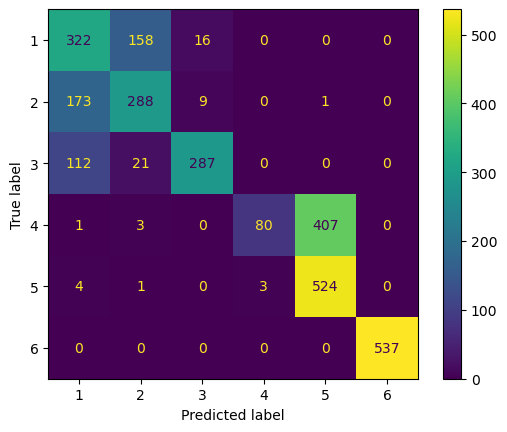

In [11]:
ConfusionMatrixDisplay.from_estimator(clf, X_test_cut, y_test)

Parâmetro                    Valor
ccp_alpha                 0.009479
class_weight                  None
criterion                     gini
max_depth                     None
max_features                  None
max_leaf_nodes                None
min_impurity_decrease          0.0
min_samples_leaf                 1
min_samples_split                2
min_weight_fraction_leaf       0.0
random_state                    42
splitter                      best 

Acurácia da árvore na base de testes: 0.8408551068883611


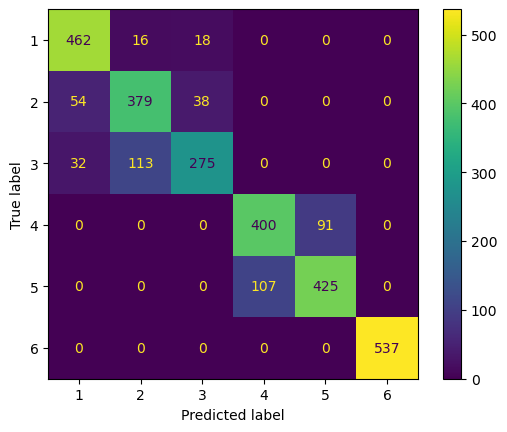

CPU times: total: 8.66 s
Wall time: 14.1 s


In [12]:
%%time

clf = DecisionTreeClassifier(random_state=42, 
                             ccp_alpha=melhor_ccp
                            ).fit(X_train, y_train)
print(pd.DataFrame(data=clf.get_params(), 
                   index=pd.Index(data=['Valor'], 
                                  name='Parâmetro')
                  ).T, 
      '\n')

print('Acurácia da árvore na base de testes:', 
      clf.score(X=X_test, y=y_test))

ConfusionMatrixDisplay.from_estimator(estimator=clf, 
                                      X=X_test, 
                                      y=y_test)
plt.show()

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [18]:
y_train_dummy = pd.get_dummies(y_train['0'])
# y_train_dummy
y_train_cut = y_train_dummy[2].to_frame()
y_train_cut

,2
0,False
1,False
2,False
3,False
4,False
...,...
7347,True
7348,True
7349,True
7350,True


In [19]:
clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=20, max_depth=4).fit(X_train, y_train_cut)
importancia_das_variaveis = pd.Series(clf.feature_importances_, index=X_train.columns)
importancia_das_variaveis.sort_values(ascending=False, inplace=True)
importancia_das_variaveis

74 tGravityAcc-arCoeff()-Z,1       0.336087
331 fBodyAcc-bandsEnergy()-1,8     0.308642
427 fBodyGyro-std()-X              0.066982
42 tGravityAcc-mean()-Y            0.063056
560 angle(Y,gravityMean)           0.053064
                                     ...   
186 tBodyGyroJerk-arCoeff()-X,1    0.000000
185 tBodyGyroJerk-entropy()-Z      0.000000
184 tBodyGyroJerk-entropy()-Y      0.000000
183 tBodyGyroJerk-entropy()-X      0.000000
561 angle(Z,gravityMean)           0.000000
Length: 561, dtype: float64

In [20]:
X_train_cut = X_train[['74 tGravityAcc-arCoeff()-Z,1', '331 fBodyAcc-bandsEnergy()-1,8', '427 fBodyGyro-std()-X']]
X_test_cut = X_test[['74 tGravityAcc-arCoeff()-Z,1', '331 fBodyAcc-bandsEnergy()-1,8', '427 fBodyGyro-std()-X']]

In [21]:
path = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(X_train_cut, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])
ccp_alphas

array([0.00000000e+00, 6.21710480e-06, 8.56405916e-06, 9.06782735e-06,
       1.04683267e-05, 1.09274350e-05, 1.45495975e-05, 2.04026115e-05,
       2.04742828e-05, 2.72034820e-05, 2.85493815e-05, 3.31471000e-05,
       3.48287005e-05, 3.82300073e-05, 4.44621708e-05, 4.79629759e-05,
       5.46963628e-05, 5.60947714e-05, 5.78740745e-05, 6.62775744e-05,
       6.86350115e-05, 6.88761502e-05, 7.18098129e-05, 7.30429127e-05,
       7.30771301e-05, 7.72306647e-05, 8.03150422e-05, 8.73219997e-05,
       8.81463477e-05, 8.84113166e-05, 8.84113166e-05, 8.98100773e-05,
       9.41309772e-05, 9.43951507e-05, 1.00409538e-04, 1.01578960e-04,
       1.04166517e-04, 1.06266005e-04, 1.08589888e-04, 1.08813928e-04,
       1.11079153e-04, 1.12813047e-04, 1.15149535e-04, 1.15496408e-04,
       1.15614799e-04, 1.22154540e-04, 1.22381876e-04, 1.26683462e-04,
       1.28303869e-04, 1.28853479e-04, 1.29834801e-04, 1.33539044e-04,
       1.34131455e-04, 1.35053745e-04, 1.36155219e-04, 1.38549369e-04,
      

In [22]:
grid_parametros = {'ccp_alpha': ccp_alphas}
grid_parametros

{'ccp_alpha': array([0.00000000e+00, 6.21710480e-06, 8.56405916e-06, 9.06782735e-06,
        1.04683267e-05, 1.09274350e-05, 1.45495975e-05, 2.04026115e-05,
        2.04742828e-05, 2.72034820e-05, 2.85493815e-05, 3.31471000e-05,
        3.48287005e-05, 3.82300073e-05, 4.44621708e-05, 4.79629759e-05,
        5.46963628e-05, 5.60947714e-05, 5.78740745e-05, 6.62775744e-05,
        6.86350115e-05, 6.88761502e-05, 7.18098129e-05, 7.30429127e-05,
        7.30771301e-05, 7.72306647e-05, 8.03150422e-05, 8.73219997e-05,
        8.81463477e-05, 8.84113166e-05, 8.84113166e-05, 8.98100773e-05,
        9.41309772e-05, 9.43951507e-05, 1.00409538e-04, 1.01578960e-04,
        1.04166517e-04, 1.06266005e-04, 1.08589888e-04, 1.08813928e-04,
        1.11079153e-04, 1.12813047e-04, 1.15149535e-04, 1.15496408e-04,
        1.15614799e-04, 1.22154540e-04, 1.22381876e-04, 1.26683462e-04,
        1.28303869e-04, 1.28853479e-04, 1.29834801e-04, 1.33539044e-04,
        1.34131455e-04, 1.35053745e-04, 1.36155219e

In [23]:
%time
grid = GridSearchCV(estimator=clf, param_grid=grid_parametros, cv=10, verbose=100)
grid.fit(X_train_cut, y_train)

CPU times: total: 0 ns
Wall time: 0 ns
Fitting 10 folds for each of 210 candidates, totalling 2100 fits
[CV 1/10; 1/210] START ccp_alpha=0.0............................................
[CV 1/10; 1/210] END .............ccp_alpha=0.0;, score=0.592 total time=   0.0s
[CV 2/10; 1/210] START ccp_alpha=0.0............................................
[CV 2/10; 1/210] END .............ccp_alpha=0.0;, score=0.515 total time=   0.0s
[CV 3/10; 1/210] START ccp_alpha=0.0............................................
[CV 3/10; 1/210] END .............ccp_alpha=0.0;, score=0.546 total time=   0.0s
[CV 4/10; 1/210] START ccp_alpha=0.0............................................
[CV 4/10; 1/210] END .............ccp_alpha=0.0;, score=0.546 total time=   0.0s
[CV 5/10; 1/210] START ccp_alpha=0.0............................................
[CV 5/10; 1/210] END .............ccp_alpha=0.0;, score=0.571 total time=   0.0s
[CV 6/10; 1/210] START ccp_alpha=0.0............................................
[CV 6

[CV 4/10; 6/210] END ccp_alpha=1.0927434994234954e-05;, score=0.546 total time=   0.0s
[CV 5/10; 6/210] START ccp_alpha=1.0927434994234954e-05.........................
[CV 5/10; 6/210] END ccp_alpha=1.0927434994234954e-05;, score=0.571 total time=   0.0s
[CV 6/10; 6/210] START ccp_alpha=1.0927434994234954e-05.........................
[CV 6/10; 6/210] END ccp_alpha=1.0927434994234954e-05;, score=0.547 total time=   0.0s
[CV 7/10; 6/210] START ccp_alpha=1.0927434994234954e-05.........................
[CV 7/10; 6/210] END ccp_alpha=1.0927434994234954e-05;, score=0.585 total time=   0.0s
[CV 8/10; 6/210] START ccp_alpha=1.0927434994234954e-05.........................
[CV 8/10; 6/210] END ccp_alpha=1.0927434994234954e-05;, score=0.646 total time=   0.0s
[CV 9/10; 6/210] START ccp_alpha=1.0927434994234954e-05.........................
[CV 9/10; 6/210] END ccp_alpha=1.0927434994234954e-05;, score=0.698 total time=   0.0s
[CV 10/10; 6/210] START ccp_alpha=1.0927434994234954e-05.................

[CV 8/10; 11/210] END ccp_alpha=2.8549381457257926e-05;, score=0.646 total time=   0.0s
[CV 9/10; 11/210] START ccp_alpha=2.8549381457257926e-05........................
[CV 9/10; 11/210] END ccp_alpha=2.8549381457257926e-05;, score=0.698 total time=   0.0s
[CV 10/10; 11/210] START ccp_alpha=2.8549381457257926e-05.......................
[CV 10/10; 11/210] END ccp_alpha=2.8549381457257926e-05;, score=0.634 total time=   0.0s
[CV 1/10; 12/210] START ccp_alpha=3.314709997165365e-05.........................
[CV 1/10; 12/210] END ccp_alpha=3.314709997165365e-05;, score=0.592 total time=   0.0s
[CV 2/10; 12/210] START ccp_alpha=3.314709997165365e-05.........................
[CV 2/10; 12/210] END ccp_alpha=3.314709997165365e-05;, score=0.515 total time=   0.0s
[CV 3/10; 12/210] START ccp_alpha=3.314709997165365e-05.........................
[CV 3/10; 12/210] END ccp_alpha=3.314709997165365e-05;, score=0.546 total time=   0.0s
[CV 4/10; 12/210] START ccp_alpha=3.314709997165365e-05..............

[CV 10/10; 16/210] END ccp_alpha=4.796297592019375e-05;, score=0.634 total time=   0.0s
[CV 1/10; 17/210] START ccp_alpha=5.4696362836570704e-05........................
[CV 1/10; 17/210] END ccp_alpha=5.4696362836570704e-05;, score=0.592 total time=   0.0s
[CV 2/10; 17/210] START ccp_alpha=5.4696362836570704e-05........................
[CV 2/10; 17/210] END ccp_alpha=5.4696362836570704e-05;, score=0.515 total time=   0.0s
[CV 3/10; 17/210] START ccp_alpha=5.4696362836570704e-05........................
[CV 3/10; 17/210] END ccp_alpha=5.4696362836570704e-05;, score=0.546 total time=   0.0s
[CV 4/10; 17/210] START ccp_alpha=5.4696362836570704e-05........................
[CV 4/10; 17/210] END ccp_alpha=5.4696362836570704e-05;, score=0.546 total time=   0.0s
[CV 5/10; 17/210] START ccp_alpha=5.4696362836570704e-05........................
[CV 5/10; 17/210] END ccp_alpha=5.4696362836570704e-05;, score=0.571 total time=   0.0s
[CV 6/10; 17/210] START ccp_alpha=5.4696362836570704e-05...........

[CV 9/10; 21/210] END ccp_alpha=6.863501150769936e-05;, score=0.698 total time=   0.0s
[CV 10/10; 21/210] START ccp_alpha=6.863501150769936e-05........................
[CV 10/10; 21/210] END ccp_alpha=6.863501150769936e-05;, score=0.634 total time=   0.0s
[CV 1/10; 22/210] START ccp_alpha=6.887615022212667e-05.........................
[CV 1/10; 22/210] END ccp_alpha=6.887615022212667e-05;, score=0.592 total time=   0.0s
[CV 2/10; 22/210] START ccp_alpha=6.887615022212667e-05.........................
[CV 2/10; 22/210] END ccp_alpha=6.887615022212667e-05;, score=0.515 total time=   0.0s
[CV 3/10; 22/210] START ccp_alpha=6.887615022212667e-05.........................
[CV 3/10; 22/210] END ccp_alpha=6.887615022212667e-05;, score=0.546 total time=   0.0s
[CV 4/10; 22/210] START ccp_alpha=6.887615022212667e-05.........................
[CV 4/10; 22/210] END ccp_alpha=6.887615022212667e-05;, score=0.546 total time=   0.0s
[CV 5/10; 22/210] START ccp_alpha=6.887615022212667e-05.................

[CV 2/10; 27/210] END ccp_alpha=8.031504223016779e-05;, score=0.515 total time=   0.0s
[CV 3/10; 27/210] START ccp_alpha=8.031504223016779e-05.........................
[CV 3/10; 27/210] END ccp_alpha=8.031504223016779e-05;, score=0.546 total time=   0.0s
[CV 4/10; 27/210] START ccp_alpha=8.031504223016779e-05.........................
[CV 4/10; 27/210] END ccp_alpha=8.031504223016779e-05;, score=0.546 total time=   0.0s
[CV 5/10; 27/210] START ccp_alpha=8.031504223016779e-05.........................
[CV 5/10; 27/210] END ccp_alpha=8.031504223016779e-05;, score=0.571 total time=   0.0s
[CV 6/10; 27/210] START ccp_alpha=8.031504223016779e-05.........................
[CV 6/10; 27/210] END ccp_alpha=8.031504223016779e-05;, score=0.547 total time=   0.0s
[CV 7/10; 27/210] START ccp_alpha=8.031504223016779e-05.........................
[CV 7/10; 27/210] END ccp_alpha=8.031504223016779e-05;, score=0.585 total time=   0.0s
[CV 8/10; 27/210] START ccp_alpha=8.031504223016779e-05..................

[CV 3/10; 32/210] END ccp_alpha=8.98100772501716e-05;, score=0.546 total time=   0.0s
[CV 4/10; 32/210] START ccp_alpha=8.98100772501716e-05..........................
[CV 4/10; 32/210] END ccp_alpha=8.98100772501716e-05;, score=0.546 total time=   0.0s
[CV 5/10; 32/210] START ccp_alpha=8.98100772501716e-05..........................
[CV 5/10; 32/210] END ccp_alpha=8.98100772501716e-05;, score=0.571 total time=   0.0s
[CV 6/10; 32/210] START ccp_alpha=8.98100772501716e-05..........................
[CV 6/10; 32/210] END ccp_alpha=8.98100772501716e-05;, score=0.547 total time=   0.0s
[CV 7/10; 32/210] START ccp_alpha=8.98100772501716e-05..........................
[CV 7/10; 32/210] END ccp_alpha=8.98100772501716e-05;, score=0.585 total time=   0.0s
[CV 8/10; 32/210] START ccp_alpha=8.98100772501716e-05..........................
[CV 8/10; 32/210] END ccp_alpha=8.98100772501716e-05;, score=0.646 total time=   0.0s
[CV 9/10; 32/210] START ccp_alpha=8.98100772501716e-05.........................

[CV 4/10; 37/210] END ccp_alpha=0.00010416651732827152;, score=0.546 total time=   0.0s
[CV 5/10; 37/210] START ccp_alpha=0.00010416651732827152........................
[CV 5/10; 37/210] END ccp_alpha=0.00010416651732827152;, score=0.571 total time=   0.0s
[CV 6/10; 37/210] START ccp_alpha=0.00010416651732827152........................
[CV 6/10; 37/210] END ccp_alpha=0.00010416651732827152;, score=0.547 total time=   0.0s
[CV 7/10; 37/210] START ccp_alpha=0.00010416651732827152........................
[CV 7/10; 37/210] END ccp_alpha=0.00010416651732827152;, score=0.585 total time=   0.0s
[CV 8/10; 37/210] START ccp_alpha=0.00010416651732827152........................
[CV 8/10; 37/210] END ccp_alpha=0.00010416651732827152;, score=0.646 total time=   0.0s
[CV 9/10; 37/210] START ccp_alpha=0.00010416651732827152........................
[CV 9/10; 37/210] END ccp_alpha=0.00010416651732827152;, score=0.698 total time=   0.0s
[CV 10/10; 37/210] START ccp_alpha=0.00010416651732827152..........

[CV 4/10; 42/210] END ccp_alpha=0.00011281304651514527;, score=0.546 total time=   0.0s
[CV 5/10; 42/210] START ccp_alpha=0.00011281304651514527........................
[CV 5/10; 42/210] END ccp_alpha=0.00011281304651514527;, score=0.571 total time=   0.0s
[CV 6/10; 42/210] START ccp_alpha=0.00011281304651514527........................
[CV 6/10; 42/210] END ccp_alpha=0.00011281304651514527;, score=0.547 total time=   0.0s
[CV 7/10; 42/210] START ccp_alpha=0.00011281304651514527........................
[CV 7/10; 42/210] END ccp_alpha=0.00011281304651514527;, score=0.585 total time=   0.0s
[CV 8/10; 42/210] START ccp_alpha=0.00011281304651514527........................
[CV 8/10; 42/210] END ccp_alpha=0.00011281304651514527;, score=0.646 total time=   0.0s
[CV 9/10; 42/210] START ccp_alpha=0.00011281304651514527........................
[CV 9/10; 42/210] END ccp_alpha=0.00011281304651514527;, score=0.698 total time=   0.0s
[CV 10/10; 42/210] START ccp_alpha=0.00011281304651514527..........

[CV 7/10; 47/210] END ccp_alpha=0.0001223818759360281;, score=0.585 total time=   0.0s
[CV 8/10; 47/210] START ccp_alpha=0.0001223818759360281.........................
[CV 8/10; 47/210] END ccp_alpha=0.0001223818759360281;, score=0.646 total time=   0.0s
[CV 9/10; 47/210] START ccp_alpha=0.0001223818759360281.........................
[CV 9/10; 47/210] END ccp_alpha=0.0001223818759360281;, score=0.698 total time=   0.0s
[CV 10/10; 47/210] START ccp_alpha=0.0001223818759360281........................
[CV 10/10; 47/210] END ccp_alpha=0.0001223818759360281;, score=0.634 total time=   0.0s
[CV 1/10; 48/210] START ccp_alpha=0.0001266834618599299.........................
[CV 1/10; 48/210] END ccp_alpha=0.0001266834618599299;, score=0.592 total time=   0.0s
[CV 2/10; 48/210] START ccp_alpha=0.0001266834618599299.........................
[CV 2/10; 48/210] END ccp_alpha=0.0001266834618599299;, score=0.515 total time=   0.0s
[CV 3/10; 48/210] START ccp_alpha=0.0001266834618599299.................

[CV 6/10; 52/210] END ccp_alpha=0.00013353904421717095;, score=0.547 total time=   0.0s
[CV 7/10; 52/210] START ccp_alpha=0.00013353904421717095........................
[CV 7/10; 52/210] END ccp_alpha=0.00013353904421717095;, score=0.585 total time=   0.0s
[CV 8/10; 52/210] START ccp_alpha=0.00013353904421717095........................
[CV 8/10; 52/210] END ccp_alpha=0.00013353904421717095;, score=0.646 total time=   0.0s
[CV 9/10; 52/210] START ccp_alpha=0.00013353904421717095........................
[CV 9/10; 52/210] END ccp_alpha=0.00013353904421717095;, score=0.698 total time=   0.0s
[CV 10/10; 52/210] START ccp_alpha=0.00013353904421717095.......................
[CV 10/10; 52/210] END ccp_alpha=0.00013353904421717095;, score=0.634 total time=   0.0s
[CV 1/10; 53/210] START ccp_alpha=0.00013413145454046734........................
[CV 1/10; 53/210] END ccp_alpha=0.00013413145454046734;, score=0.592 total time=   0.0s
[CV 2/10; 53/210] START ccp_alpha=0.00013413145454046734..........

[CV 8/10; 57/210] END ccp_alpha=0.00014270731082483001;, score=0.646 total time=   0.0s
[CV 9/10; 57/210] START ccp_alpha=0.00014270731082483001........................
[CV 9/10; 57/210] END ccp_alpha=0.00014270731082483001;, score=0.698 total time=   0.0s
[CV 10/10; 57/210] START ccp_alpha=0.00014270731082483001.......................
[CV 10/10; 57/210] END ccp_alpha=0.00014270731082483001;, score=0.634 total time=   0.0s
[CV 1/10; 58/210] START ccp_alpha=0.0001437165089206889.........................
[CV 1/10; 58/210] END ccp_alpha=0.0001437165089206889;, score=0.592 total time=   0.0s
[CV 2/10; 58/210] START ccp_alpha=0.0001437165089206889.........................
[CV 2/10; 58/210] END ccp_alpha=0.0001437165089206889;, score=0.515 total time=   0.0s
[CV 3/10; 58/210] START ccp_alpha=0.0001437165089206889.........................
[CV 3/10; 58/210] END ccp_alpha=0.0001437165089206889;, score=0.546 total time=   0.0s
[CV 4/10; 58/210] START ccp_alpha=0.0001437165089206889..............

[CV 7/10; 62/210] END ccp_alpha=0.00015689020540308194;, score=0.585 total time=   0.0s
[CV 8/10; 62/210] START ccp_alpha=0.00015689020540308194........................
[CV 8/10; 62/210] END ccp_alpha=0.00015689020540308194;, score=0.646 total time=   0.0s
[CV 9/10; 62/210] START ccp_alpha=0.00015689020540308194........................
[CV 9/10; 62/210] END ccp_alpha=0.00015689020540308194;, score=0.698 total time=   0.0s
[CV 10/10; 62/210] START ccp_alpha=0.00015689020540308194.......................
[CV 10/10; 62/210] END ccp_alpha=0.00015689020540308194;, score=0.634 total time=   0.0s
[CV 1/10; 63/210] START ccp_alpha=0.00015936052265171...........................
[CV 1/10; 63/210] END ccp_alpha=0.00015936052265171;, score=0.592 total time=   0.0s
[CV 2/10; 63/210] START ccp_alpha=0.00015936052265171...........................
[CV 2/10; 63/210] END ccp_alpha=0.00015936052265171;, score=0.515 total time=   0.0s
[CV 3/10; 63/210] START ccp_alpha=0.00015936052265171...................

[CV 7/10; 67/210] END ccp_alpha=0.0001717713634485597;, score=0.585 total time=   0.0s
[CV 8/10; 67/210] START ccp_alpha=0.0001717713634485597.........................
[CV 8/10; 67/210] END ccp_alpha=0.0001717713634485597;, score=0.646 total time=   0.0s
[CV 9/10; 67/210] START ccp_alpha=0.0001717713634485597.........................
[CV 9/10; 67/210] END ccp_alpha=0.0001717713634485597;, score=0.698 total time=   0.0s
[CV 10/10; 67/210] START ccp_alpha=0.0001717713634485597........................
[CV 10/10; 67/210] END ccp_alpha=0.0001717713634485597;, score=0.634 total time=   0.0s
[CV 1/10; 68/210] START ccp_alpha=0.000171935427648158..........................
[CV 1/10; 68/210] END ccp_alpha=0.000171935427648158;, score=0.592 total time=   0.0s
[CV 2/10; 68/210] START ccp_alpha=0.000171935427648158..........................
[CV 2/10; 68/210] END ccp_alpha=0.000171935427648158;, score=0.515 total time=   0.0s
[CV 3/10; 68/210] START ccp_alpha=0.000171935427648158....................

[CV 7/10; 72/210] END ccp_alpha=0.00018337977790471895;, score=0.585 total time=   0.0s
[CV 8/10; 72/210] START ccp_alpha=0.00018337977790471895........................
[CV 8/10; 72/210] END ccp_alpha=0.00018337977790471895;, score=0.646 total time=   0.0s
[CV 9/10; 72/210] START ccp_alpha=0.00018337977790471895........................
[CV 9/10; 72/210] END ccp_alpha=0.00018337977790471895;, score=0.698 total time=   0.0s
[CV 10/10; 72/210] START ccp_alpha=0.00018337977790471895.......................
[CV 10/10; 72/210] END ccp_alpha=0.00018337977790471895;, score=0.634 total time=   0.0s
[CV 1/10; 73/210] START ccp_alpha=0.0001837739938810091.........................
[CV 1/10; 73/210] END ccp_alpha=0.0001837739938810091;, score=0.592 total time=   0.0s
[CV 2/10; 73/210] START ccp_alpha=0.0001837739938810091.........................
[CV 2/10; 73/210] END ccp_alpha=0.0001837739938810091;, score=0.515 total time=   0.0s
[CV 3/10; 73/210] START ccp_alpha=0.0001837739938810091.............

[CV 8/10; 77/210] END ccp_alpha=0.00019042437431991298;, score=0.646 total time=   0.0s
[CV 9/10; 77/210] START ccp_alpha=0.00019042437431991298........................
[CV 9/10; 77/210] END ccp_alpha=0.00019042437431991298;, score=0.698 total time=   0.0s
[CV 10/10; 77/210] START ccp_alpha=0.00019042437431991298.......................
[CV 10/10; 77/210] END ccp_alpha=0.00019042437431991298;, score=0.634 total time=   0.0s
[CV 1/10; 78/210] START ccp_alpha=0.00019142083886371166........................
[CV 1/10; 78/210] END ccp_alpha=0.00019142083886371166;, score=0.592 total time=   0.0s
[CV 2/10; 78/210] START ccp_alpha=0.00019142083886371166........................
[CV 2/10; 78/210] END ccp_alpha=0.00019142083886371166;, score=0.515 total time=   0.0s
[CV 3/10; 78/210] START ccp_alpha=0.00019142083886371166........................
[CV 3/10; 78/210] END ccp_alpha=0.00019142083886371166;, score=0.546 total time=   0.0s
[CV 4/10; 78/210] START ccp_alpha=0.00019142083886371166..........

[CV 2/10; 83/210] END ccp_alpha=0.00019816520254430006;, score=0.515 total time=   0.0s
[CV 3/10; 83/210] START ccp_alpha=0.00019816520254430006........................
[CV 3/10; 83/210] END ccp_alpha=0.00019816520254430006;, score=0.546 total time=   0.0s
[CV 4/10; 83/210] START ccp_alpha=0.00019816520254430006........................
[CV 4/10; 83/210] END ccp_alpha=0.00019816520254430006;, score=0.546 total time=   0.0s
[CV 5/10; 83/210] START ccp_alpha=0.00019816520254430006........................
[CV 5/10; 83/210] END ccp_alpha=0.00019816520254430006;, score=0.571 total time=   0.0s
[CV 6/10; 83/210] START ccp_alpha=0.00019816520254430006........................
[CV 6/10; 83/210] END ccp_alpha=0.00019816520254430006;, score=0.547 total time=   0.0s
[CV 7/10; 83/210] START ccp_alpha=0.00019816520254430006........................
[CV 7/10; 83/210] END ccp_alpha=0.00019816520254430006;, score=0.585 total time=   0.0s
[CV 8/10; 83/210] START ccp_alpha=0.00019816520254430006...........

[CV 5/10; 88/210] END ccp_alpha=0.00020239549726692573;, score=0.571 total time=   0.0s
[CV 6/10; 88/210] START ccp_alpha=0.00020239549726692573........................
[CV 6/10; 88/210] END ccp_alpha=0.00020239549726692573;, score=0.547 total time=   0.0s
[CV 7/10; 88/210] START ccp_alpha=0.00020239549726692573........................
[CV 7/10; 88/210] END ccp_alpha=0.00020239549726692573;, score=0.585 total time=   0.0s
[CV 8/10; 88/210] START ccp_alpha=0.00020239549726692573........................
[CV 8/10; 88/210] END ccp_alpha=0.00020239549726692573;, score=0.646 total time=   0.0s
[CV 9/10; 88/210] START ccp_alpha=0.00020239549726692573........................
[CV 9/10; 88/210] END ccp_alpha=0.00020239549726692573;, score=0.698 total time=   0.0s
[CV 10/10; 88/210] START ccp_alpha=0.00020239549726692573.......................
[CV 10/10; 88/210] END ccp_alpha=0.00020239549726692573;, score=0.634 total time=   0.0s
[CV 1/10; 89/210] START ccp_alpha=0.00020245985425528662..........

[CV 8/10; 93/210] END ccp_alpha=0.00021589628069783665;, score=0.646 total time=   0.0s
[CV 9/10; 93/210] START ccp_alpha=0.00021589628069783665........................
[CV 9/10; 93/210] END ccp_alpha=0.00021589628069783665;, score=0.698 total time=   0.0s
[CV 10/10; 93/210] START ccp_alpha=0.00021589628069783665.......................
[CV 10/10; 93/210] END ccp_alpha=0.00021589628069783665;, score=0.634 total time=   0.0s
[CV 1/10; 94/210] START ccp_alpha=0.0002182003336256345.........................
[CV 1/10; 94/210] END ccp_alpha=0.0002182003336256345;, score=0.592 total time=   0.0s
[CV 2/10; 94/210] START ccp_alpha=0.0002182003336256345.........................
[CV 2/10; 94/210] END ccp_alpha=0.0002182003336256345;, score=0.515 total time=   0.0s
[CV 3/10; 94/210] START ccp_alpha=0.0002182003336256345.........................
[CV 3/10; 94/210] END ccp_alpha=0.0002182003336256345;, score=0.546 total time=   0.0s
[CV 4/10; 94/210] START ccp_alpha=0.0002182003336256345..............

[CV 10/10; 98/210] END ccp_alpha=0.0002262010749497145;, score=0.634 total time=   0.0s
[CV 1/10; 99/210] START ccp_alpha=0.00022961034250479264........................
[CV 1/10; 99/210] END ccp_alpha=0.00022961034250479264;, score=0.592 total time=   0.0s
[CV 2/10; 99/210] START ccp_alpha=0.00022961034250479264........................
[CV 2/10; 99/210] END ccp_alpha=0.00022961034250479264;, score=0.515 total time=   0.0s
[CV 3/10; 99/210] START ccp_alpha=0.00022961034250479264........................
[CV 3/10; 99/210] END ccp_alpha=0.00022961034250479264;, score=0.546 total time=   0.0s
[CV 4/10; 99/210] START ccp_alpha=0.00022961034250479264........................
[CV 4/10; 99/210] END ccp_alpha=0.00022961034250479264;, score=0.546 total time=   0.0s
[CV 5/10; 99/210] START ccp_alpha=0.00022961034250479264........................
[CV 5/10; 99/210] END ccp_alpha=0.00022961034250479264;, score=0.571 total time=   0.0s
[CV 6/10; 99/210] START ccp_alpha=0.00022961034250479264...........

[CV 9/10; 103/210] END ccp_alpha=0.00023874537883563935;, score=0.698 total time=   0.0s
[CV 10/10; 103/210] START ccp_alpha=0.00023874537883563935......................
[CV 10/10; 103/210] END ccp_alpha=0.00023874537883563935;, score=0.634 total time=   0.0s
[CV 1/10; 104/210] START ccp_alpha=0.00024321208352764403.......................
[CV 1/10; 104/210] END ccp_alpha=0.00024321208352764403;, score=0.592 total time=   0.0s
[CV 2/10; 104/210] START ccp_alpha=0.00024321208352764403.......................
[CV 2/10; 104/210] END ccp_alpha=0.00024321208352764403;, score=0.515 total time=   0.0s
[CV 3/10; 104/210] START ccp_alpha=0.00024321208352764403.......................
[CV 3/10; 104/210] END ccp_alpha=0.00024321208352764403;, score=0.546 total time=   0.0s
[CV 4/10; 104/210] START ccp_alpha=0.00024321208352764403.......................
[CV 4/10; 104/210] END ccp_alpha=0.00024321208352764403;, score=0.546 total time=   0.0s
[CV 5/10; 104/210] START ccp_alpha=0.00024321208352764403...

[CV 3/10; 109/210] END ccp_alpha=0.00025617353579793223;, score=0.546 total time=   0.0s
[CV 4/10; 109/210] START ccp_alpha=0.00025617353579793223.......................
[CV 4/10; 109/210] END ccp_alpha=0.00025617353579793223;, score=0.546 total time=   0.0s
[CV 5/10; 109/210] START ccp_alpha=0.00025617353579793223.......................
[CV 5/10; 109/210] END ccp_alpha=0.00025617353579793223;, score=0.571 total time=   0.0s
[CV 6/10; 109/210] START ccp_alpha=0.00025617353579793223.......................
[CV 6/10; 109/210] END ccp_alpha=0.00025617353579793223;, score=0.547 total time=   0.0s
[CV 7/10; 109/210] START ccp_alpha=0.00025617353579793223.......................
[CV 7/10; 109/210] END ccp_alpha=0.00025617353579793223;, score=0.585 total time=   0.0s
[CV 8/10; 109/210] START ccp_alpha=0.00025617353579793223.......................
[CV 8/10; 109/210] END ccp_alpha=0.00025617353579793223;, score=0.646 total time=   0.0s
[CV 9/10; 109/210] START ccp_alpha=0.00025617353579793223....

[CV 2/10; 114/210] END ccp_alpha=0.00029251635892179467;, score=0.515 total time=   0.0s
[CV 3/10; 114/210] START ccp_alpha=0.00029251635892179467.......................
[CV 3/10; 114/210] END ccp_alpha=0.00029251635892179467;, score=0.546 total time=   0.0s
[CV 4/10; 114/210] START ccp_alpha=0.00029251635892179467.......................
[CV 4/10; 114/210] END ccp_alpha=0.00029251635892179467;, score=0.546 total time=   0.0s
[CV 5/10; 114/210] START ccp_alpha=0.00029251635892179467.......................
[CV 5/10; 114/210] END ccp_alpha=0.00029251635892179467;, score=0.571 total time=   0.0s
[CV 6/10; 114/210] START ccp_alpha=0.00029251635892179467.......................
[CV 6/10; 114/210] END ccp_alpha=0.00029251635892179467;, score=0.547 total time=   0.0s
[CV 7/10; 114/210] START ccp_alpha=0.00029251635892179467.......................
[CV 7/10; 114/210] END ccp_alpha=0.00029251635892179467;, score=0.585 total time=   0.0s
[CV 8/10; 114/210] START ccp_alpha=0.00029251635892179467....

[CV 1/10; 119/210] END ccp_alpha=0.0002978563074255338;, score=0.592 total time=   0.0s
[CV 2/10; 119/210] START ccp_alpha=0.0002978563074255338........................
[CV 2/10; 119/210] END ccp_alpha=0.0002978563074255338;, score=0.515 total time=   0.0s
[CV 3/10; 119/210] START ccp_alpha=0.0002978563074255338........................
[CV 3/10; 119/210] END ccp_alpha=0.0002978563074255338;, score=0.546 total time=   0.0s
[CV 4/10; 119/210] START ccp_alpha=0.0002978563074255338........................
[CV 4/10; 119/210] END ccp_alpha=0.0002978563074255338;, score=0.546 total time=   0.0s
[CV 5/10; 119/210] START ccp_alpha=0.0002978563074255338........................
[CV 5/10; 119/210] END ccp_alpha=0.0002978563074255338;, score=0.571 total time=   0.0s
[CV 6/10; 119/210] START ccp_alpha=0.0002978563074255338........................
[CV 6/10; 119/210] END ccp_alpha=0.0002978563074255338;, score=0.547 total time=   0.0s
[CV 7/10; 119/210] START ccp_alpha=0.0002978563074255338...........

[CV 3/10; 124/210] END ccp_alpha=0.00031079358097046116;, score=0.546 total time=   0.0s
[CV 4/10; 124/210] START ccp_alpha=0.00031079358097046116.......................
[CV 4/10; 124/210] END ccp_alpha=0.00031079358097046116;, score=0.546 total time=   0.0s
[CV 5/10; 124/210] START ccp_alpha=0.00031079358097046116.......................
[CV 5/10; 124/210] END ccp_alpha=0.00031079358097046116;, score=0.571 total time=   0.0s
[CV 6/10; 124/210] START ccp_alpha=0.00031079358097046116.......................
[CV 6/10; 124/210] END ccp_alpha=0.00031079358097046116;, score=0.547 total time=   0.0s
[CV 7/10; 124/210] START ccp_alpha=0.00031079358097046116.......................
[CV 7/10; 124/210] END ccp_alpha=0.00031079358097046116;, score=0.585 total time=   0.0s
[CV 8/10; 124/210] START ccp_alpha=0.00031079358097046116.......................
[CV 8/10; 124/210] END ccp_alpha=0.00031079358097046116;, score=0.646 total time=   0.0s
[CV 9/10; 124/210] START ccp_alpha=0.00031079358097046116....

[CV 5/10; 129/210] END ccp_alpha=0.0003239721236855094;, score=0.571 total time=   0.0s
[CV 6/10; 129/210] START ccp_alpha=0.0003239721236855094........................
[CV 6/10; 129/210] END ccp_alpha=0.0003239721236855094;, score=0.547 total time=   0.0s
[CV 7/10; 129/210] START ccp_alpha=0.0003239721236855094........................
[CV 7/10; 129/210] END ccp_alpha=0.0003239721236855094;, score=0.585 total time=   0.0s
[CV 8/10; 129/210] START ccp_alpha=0.0003239721236855094........................
[CV 8/10; 129/210] END ccp_alpha=0.0003239721236855094;, score=0.646 total time=   0.0s
[CV 9/10; 129/210] START ccp_alpha=0.0003239721236855094........................
[CV 9/10; 129/210] END ccp_alpha=0.0003239721236855094;, score=0.698 total time=   0.0s
[CV 10/10; 129/210] START ccp_alpha=0.0003239721236855094.......................
[CV 10/10; 129/210] END ccp_alpha=0.0003239721236855094;, score=0.634 total time=   0.0s
[CV 1/10; 130/210] START ccp_alpha=0.00032789911394372727.........

[CV 4/10; 134/210] END ccp_alpha=0.00035093722765744666;, score=0.546 total time=   0.0s
[CV 5/10; 134/210] START ccp_alpha=0.00035093722765744666.......................
[CV 5/10; 134/210] END ccp_alpha=0.00035093722765744666;, score=0.571 total time=   0.0s
[CV 6/10; 134/210] START ccp_alpha=0.00035093722765744666.......................
[CV 6/10; 134/210] END ccp_alpha=0.00035093722765744666;, score=0.547 total time=   0.0s
[CV 7/10; 134/210] START ccp_alpha=0.00035093722765744666.......................
[CV 7/10; 134/210] END ccp_alpha=0.00035093722765744666;, score=0.585 total time=   0.0s
[CV 8/10; 134/210] START ccp_alpha=0.00035093722765744666.......................
[CV 8/10; 134/210] END ccp_alpha=0.00035093722765744666;, score=0.646 total time=   0.0s
[CV 9/10; 134/210] START ccp_alpha=0.00035093722765744666.......................
[CV 9/10; 134/210] END ccp_alpha=0.00035093722765744666;, score=0.698 total time=   0.0s
[CV 10/10; 134/210] START ccp_alpha=0.00035093722765744666...

[CV 6/10; 139/210] END ccp_alpha=0.00037415552691675603;, score=0.547 total time=   0.0s
[CV 7/10; 139/210] START ccp_alpha=0.00037415552691675603.......................
[CV 7/10; 139/210] END ccp_alpha=0.00037415552691675603;, score=0.585 total time=   0.0s
[CV 8/10; 139/210] START ccp_alpha=0.00037415552691675603.......................
[CV 8/10; 139/210] END ccp_alpha=0.00037415552691675603;, score=0.646 total time=   0.0s
[CV 9/10; 139/210] START ccp_alpha=0.00037415552691675603.......................
[CV 9/10; 139/210] END ccp_alpha=0.00037415552691675603;, score=0.698 total time=   0.0s
[CV 10/10; 139/210] START ccp_alpha=0.00037415552691675603......................
[CV 10/10; 139/210] END ccp_alpha=0.00037415552691675603;, score=0.634 total time=   0.0s
[CV 1/10; 140/210] START ccp_alpha=0.0003795031732145319........................
[CV 1/10; 140/210] END ccp_alpha=0.0003795031732145319;, score=0.592 total time=   0.0s
[CV 2/10; 140/210] START ccp_alpha=0.0003795031732145319.....

[CV 7/10; 144/210] END ccp_alpha=0.00041359513131900005;, score=0.585 total time=   0.0s
[CV 8/10; 144/210] START ccp_alpha=0.00041359513131900005.......................
[CV 8/10; 144/210] END ccp_alpha=0.00041359513131900005;, score=0.646 total time=   0.0s
[CV 9/10; 144/210] START ccp_alpha=0.00041359513131900005.......................
[CV 9/10; 144/210] END ccp_alpha=0.00041359513131900005;, score=0.698 total time=   0.0s
[CV 10/10; 144/210] START ccp_alpha=0.00041359513131900005......................
[CV 10/10; 144/210] END ccp_alpha=0.00041359513131900005;, score=0.634 total time=   0.0s
[CV 1/10; 145/210] START ccp_alpha=0.0004195235384175395........................
[CV 1/10; 145/210] END ccp_alpha=0.0004195235384175395;, score=0.592 total time=   0.0s
[CV 2/10; 145/210] START ccp_alpha=0.0004195235384175395........................
[CV 2/10; 145/210] END ccp_alpha=0.0004195235384175395;, score=0.515 total time=   0.0s
[CV 3/10; 145/210] START ccp_alpha=0.0004195235384175395......

[CV 8/10; 149/210] END ccp_alpha=0.00044325981417929483;, score=0.646 total time=   0.0s
[CV 9/10; 149/210] START ccp_alpha=0.00044325981417929483.......................
[CV 9/10; 149/210] END ccp_alpha=0.00044325981417929483;, score=0.698 total time=   0.0s
[CV 10/10; 149/210] START ccp_alpha=0.00044325981417929483......................
[CV 10/10; 149/210] END ccp_alpha=0.00044325981417929483;, score=0.634 total time=   0.0s
[CV 1/10; 150/210] START ccp_alpha=0.0004784577183588757........................
[CV 1/10; 150/210] END ccp_alpha=0.0004784577183588757;, score=0.592 total time=   0.0s
[CV 2/10; 150/210] START ccp_alpha=0.0004784577183588757........................
[CV 2/10; 150/210] END ccp_alpha=0.0004784577183588757;, score=0.515 total time=   0.0s
[CV 3/10; 150/210] START ccp_alpha=0.0004784577183588757........................
[CV 3/10; 150/210] END ccp_alpha=0.0004784577183588757;, score=0.546 total time=   0.0s
[CV 4/10; 150/210] START ccp_alpha=0.0004784577183588757.......

[CV 1/10; 155/210] END ccp_alpha=0.0004974706777688201;, score=0.592 total time=   0.0s
[CV 2/10; 155/210] START ccp_alpha=0.0004974706777688201........................
[CV 2/10; 155/210] END ccp_alpha=0.0004974706777688201;, score=0.515 total time=   0.0s
[CV 3/10; 155/210] START ccp_alpha=0.0004974706777688201........................
[CV 3/10; 155/210] END ccp_alpha=0.0004974706777688201;, score=0.546 total time=   0.0s
[CV 4/10; 155/210] START ccp_alpha=0.0004974706777688201........................
[CV 4/10; 155/210] END ccp_alpha=0.0004974706777688201;, score=0.546 total time=   0.0s
[CV 5/10; 155/210] START ccp_alpha=0.0004974706777688201........................
[CV 5/10; 155/210] END ccp_alpha=0.0004974706777688201;, score=0.571 total time=   0.0s
[CV 6/10; 155/210] START ccp_alpha=0.0004974706777688201........................
[CV 6/10; 155/210] END ccp_alpha=0.0004974706777688201;, score=0.547 total time=   0.0s
[CV 7/10; 155/210] START ccp_alpha=0.0004974706777688201...........

[CV 3/10; 160/210] END ccp_alpha=0.0005307636184405159;, score=0.546 total time=   0.0s
[CV 4/10; 160/210] START ccp_alpha=0.0005307636184405159........................
[CV 4/10; 160/210] END ccp_alpha=0.0005307636184405159;, score=0.546 total time=   0.0s
[CV 5/10; 160/210] START ccp_alpha=0.0005307636184405159........................
[CV 5/10; 160/210] END ccp_alpha=0.0005307636184405159;, score=0.571 total time=   0.0s
[CV 6/10; 160/210] START ccp_alpha=0.0005307636184405159........................
[CV 6/10; 160/210] END ccp_alpha=0.0005307636184405159;, score=0.547 total time=   0.0s
[CV 7/10; 160/210] START ccp_alpha=0.0005307636184405159........................
[CV 7/10; 160/210] END ccp_alpha=0.0005307636184405159;, score=0.585 total time=   0.0s
[CV 8/10; 160/210] START ccp_alpha=0.0005307636184405159........................
[CV 8/10; 160/210] END ccp_alpha=0.0005307636184405159;, score=0.646 total time=   0.0s
[CV 9/10; 160/210] START ccp_alpha=0.0005307636184405159...........

[CV 6/10; 165/210] END ccp_alpha=0.0006058957364724494;, score=0.547 total time=   0.0s
[CV 7/10; 165/210] START ccp_alpha=0.0006058957364724494........................
[CV 7/10; 165/210] END ccp_alpha=0.0006058957364724494;, score=0.585 total time=   0.0s
[CV 8/10; 165/210] START ccp_alpha=0.0006058957364724494........................
[CV 8/10; 165/210] END ccp_alpha=0.0006058957364724494;, score=0.646 total time=   0.0s
[CV 9/10; 165/210] START ccp_alpha=0.0006058957364724494........................
[CV 9/10; 165/210] END ccp_alpha=0.0006058957364724494;, score=0.698 total time=   0.0s
[CV 10/10; 165/210] START ccp_alpha=0.0006058957364724494.......................
[CV 10/10; 165/210] END ccp_alpha=0.0006058957364724494;, score=0.634 total time=   0.0s
[CV 1/10; 166/210] START ccp_alpha=0.000628365234421599.........................
[CV 1/10; 166/210] END ccp_alpha=0.000628365234421599;, score=0.592 total time=   0.0s
[CV 2/10; 166/210] START ccp_alpha=0.000628365234421599............

[CV 6/10; 170/210] END ccp_alpha=0.0006936887921653971;, score=0.547 total time=   0.0s
[CV 7/10; 170/210] START ccp_alpha=0.0006936887921653971........................
[CV 7/10; 170/210] END ccp_alpha=0.0006936887921653971;, score=0.585 total time=   0.0s
[CV 8/10; 170/210] START ccp_alpha=0.0006936887921653971........................
[CV 8/10; 170/210] END ccp_alpha=0.0006936887921653971;, score=0.646 total time=   0.0s
[CV 9/10; 170/210] START ccp_alpha=0.0006936887921653971........................
[CV 9/10; 170/210] END ccp_alpha=0.0006936887921653971;, score=0.698 total time=   0.0s
[CV 10/10; 170/210] START ccp_alpha=0.0006936887921653971.......................
[CV 10/10; 170/210] END ccp_alpha=0.0006936887921653971;, score=0.634 total time=   0.0s
[CV 1/10; 171/210] START ccp_alpha=0.0006984398422101648........................
[CV 1/10; 171/210] END ccp_alpha=0.0006984398422101648;, score=0.592 total time=   0.0s
[CV 2/10; 171/210] START ccp_alpha=0.0006984398422101648..........

[CV 7/10; 175/210] END ccp_alpha=0.0007964123418953001;, score=0.585 total time=   0.0s
[CV 8/10; 175/210] START ccp_alpha=0.0007964123418953001........................
[CV 8/10; 175/210] END ccp_alpha=0.0007964123418953001;, score=0.646 total time=   0.0s
[CV 9/10; 175/210] START ccp_alpha=0.0007964123418953001........................
[CV 9/10; 175/210] END ccp_alpha=0.0007964123418953001;, score=0.698 total time=   0.0s
[CV 10/10; 175/210] START ccp_alpha=0.0007964123418953001.......................
[CV 10/10; 175/210] END ccp_alpha=0.0007964123418953001;, score=0.634 total time=   0.0s
[CV 1/10; 176/210] START ccp_alpha=0.0007965294689995465........................
[CV 1/10; 176/210] END ccp_alpha=0.0007965294689995465;, score=0.592 total time=   0.0s
[CV 2/10; 176/210] START ccp_alpha=0.0007965294689995465........................
[CV 2/10; 176/210] END ccp_alpha=0.0007965294689995465;, score=0.515 total time=   0.0s
[CV 3/10; 176/210] START ccp_alpha=0.0007965294689995465..........

[CV 7/10; 180/210] END ccp_alpha=0.0009076921258921941;, score=0.585 total time=   0.0s
[CV 8/10; 180/210] START ccp_alpha=0.0009076921258921941........................
[CV 8/10; 180/210] END ccp_alpha=0.0009076921258921941;, score=0.646 total time=   0.0s
[CV 9/10; 180/210] START ccp_alpha=0.0009076921258921941........................
[CV 9/10; 180/210] END ccp_alpha=0.0009076921258921941;, score=0.698 total time=   0.0s
[CV 10/10; 180/210] START ccp_alpha=0.0009076921258921941.......................
[CV 10/10; 180/210] END ccp_alpha=0.0009076921258921941;, score=0.634 total time=   0.0s
[CV 1/10; 181/210] START ccp_alpha=0.0009120866348735802........................
[CV 1/10; 181/210] END ccp_alpha=0.0009120866348735802;, score=0.592 total time=   0.0s
[CV 2/10; 181/210] START ccp_alpha=0.0009120866348735802........................
[CV 2/10; 181/210] END ccp_alpha=0.0009120866348735802;, score=0.515 total time=   0.0s
[CV 3/10; 181/210] START ccp_alpha=0.0009120866348735802..........

[CV 7/10; 185/210] END ccp_alpha=0.0010475548648831712;, score=0.585 total time=   0.0s
[CV 8/10; 185/210] START ccp_alpha=0.0010475548648831712........................
[CV 8/10; 185/210] END ccp_alpha=0.0010475548648831712;, score=0.646 total time=   0.0s
[CV 9/10; 185/210] START ccp_alpha=0.0010475548648831712........................
[CV 9/10; 185/210] END ccp_alpha=0.0010475548648831712;, score=0.698 total time=   0.0s
[CV 10/10; 185/210] START ccp_alpha=0.0010475548648831712.......................
[CV 10/10; 185/210] END ccp_alpha=0.0010475548648831712;, score=0.634 total time=   0.0s
[CV 1/10; 186/210] START ccp_alpha=0.0011604842966308074........................
[CV 1/10; 186/210] END ccp_alpha=0.0011604842966308074;, score=0.592 total time=   0.0s
[CV 2/10; 186/210] START ccp_alpha=0.0011604842966308074........................
[CV 2/10; 186/210] END ccp_alpha=0.0011604842966308074;, score=0.515 total time=   0.0s
[CV 3/10; 186/210] START ccp_alpha=0.0011604842966308074..........

[CV 9/10; 190/210] END ccp_alpha=0.0015571767731724206;, score=0.710 total time=   0.0s
[CV 10/10; 190/210] START ccp_alpha=0.0015571767731724206.......................
[CV 10/10; 190/210] END ccp_alpha=0.0015571767731724206;, score=0.633 total time=   0.0s
[CV 1/10; 191/210] START ccp_alpha=0.0016405092902236629........................
[CV 1/10; 191/210] END ccp_alpha=0.0016405092902236629;, score=0.592 total time=   0.0s
[CV 2/10; 191/210] START ccp_alpha=0.0016405092902236629........................
[CV 2/10; 191/210] END ccp_alpha=0.0016405092902236629;, score=0.515 total time=   0.0s
[CV 3/10; 191/210] START ccp_alpha=0.0016405092902236629........................
[CV 3/10; 191/210] END ccp_alpha=0.0016405092902236629;, score=0.546 total time=   0.0s
[CV 4/10; 191/210] START ccp_alpha=0.0016405092902236629........................
[CV 4/10; 191/210] END ccp_alpha=0.0016405092902236629;, score=0.546 total time=   0.0s
[CV 5/10; 191/210] START ccp_alpha=0.0016405092902236629..........

[CV 9/10; 195/210] END ccp_alpha=0.0020166219190147563;, score=0.707 total time=   0.0s
[CV 10/10; 195/210] START ccp_alpha=0.0020166219190147563.......................
[CV 10/10; 195/210] END ccp_alpha=0.0020166219190147563;, score=0.633 total time=   0.0s
[CV 1/10; 196/210] START ccp_alpha=0.002096652420083415.........................
[CV 1/10; 196/210] END ccp_alpha=0.002096652420083415;, score=0.592 total time=   0.0s
[CV 2/10; 196/210] START ccp_alpha=0.002096652420083415.........................
[CV 2/10; 196/210] END ccp_alpha=0.002096652420083415;, score=0.515 total time=   0.0s
[CV 3/10; 196/210] START ccp_alpha=0.002096652420083415.........................
[CV 3/10; 196/210] END ccp_alpha=0.002096652420083415;, score=0.540 total time=   0.0s
[CV 4/10; 196/210] START ccp_alpha=0.002096652420083415.........................
[CV 4/10; 196/210] END ccp_alpha=0.002096652420083415;, score=0.546 total time=   0.0s
[CV 5/10; 196/210] START ccp_alpha=0.002096652420083415...............

[CV 3/10; 201/210] END ccp_alpha=0.003716493859130865;, score=0.540 total time=   0.0s
[CV 4/10; 201/210] START ccp_alpha=0.003716493859130865.........................
[CV 4/10; 201/210] END ccp_alpha=0.003716493859130865;, score=0.546 total time=   0.0s
[CV 5/10; 201/210] START ccp_alpha=0.003716493859130865.........................
[CV 5/10; 201/210] END ccp_alpha=0.003716493859130865;, score=0.586 total time=   0.0s
[CV 6/10; 201/210] START ccp_alpha=0.003716493859130865.........................
[CV 6/10; 201/210] END ccp_alpha=0.003716493859130865;, score=0.551 total time=   0.0s
[CV 7/10; 201/210] START ccp_alpha=0.003716493859130865.........................
[CV 7/10; 201/210] END ccp_alpha=0.003716493859130865;, score=0.578 total time=   0.0s
[CV 8/10; 201/210] START ccp_alpha=0.003716493859130865.........................
[CV 8/10; 201/210] END ccp_alpha=0.003716493859130865;, score=0.614 total time=   0.0s
[CV 9/10; 201/210] START ccp_alpha=0.003716493859130865..................

[CV 3/10; 206/210] END ccp_alpha=0.011770266991835782;, score=0.527 total time=   0.0s
[CV 4/10; 206/210] START ccp_alpha=0.011770266991835782.........................
[CV 4/10; 206/210] END ccp_alpha=0.011770266991835782;, score=0.516 total time=   0.0s
[CV 5/10; 206/210] START ccp_alpha=0.011770266991835782.........................
[CV 5/10; 206/210] END ccp_alpha=0.011770266991835782;, score=0.561 total time=   0.0s
[CV 6/10; 206/210] START ccp_alpha=0.011770266991835782.........................
[CV 6/10; 206/210] END ccp_alpha=0.011770266991835782;, score=0.446 total time=   0.0s
[CV 7/10; 206/210] START ccp_alpha=0.011770266991835782.........................
[CV 7/10; 206/210] END ccp_alpha=0.011770266991835782;, score=0.505 total time=   0.0s
[CV 8/10; 206/210] START ccp_alpha=0.011770266991835782.........................
[CV 8/10; 206/210] END ccp_alpha=0.011770266991835782;, score=0.589 total time=   0.0s
[CV 9/10; 206/210] START ccp_alpha=0.011770266991835782..................

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=4, min_samples_leaf=20,
                                              random_state=42),
             param_grid={'ccp_alpha': array([0.00000000e+00, 6.21710480e-06, 8.56405916e-06, 9.06782735e-06,
       1.04683267e-05, 1.09274350e-05, 1.45495975e-05, 2.04026115e-05,
       2.04742828e-05, 2.72034820e-05, 2.85493815e-05, 3.31471000e-05,
       3.48287005e-05, 3.82300073e-05, 4.446217...
       1.04755486e-03, 1.16048430e-03, 1.22540114e-03, 1.37311237e-03,
       1.47039573e-03, 1.55717677e-03, 1.64050929e-03, 1.75878504e-03,
       1.83012446e-03, 1.83316140e-03, 2.01662192e-03, 2.09665242e-03,
       2.31011199e-03, 2.58872652e-03, 3.41875639e-03, 3.53338094e-03,
       3.71649386e-03, 5.19302930e-03, 5.80432992e-03, 7.53543659e-03,
       9.23054506e-03, 1.17702670e-02, 1.56051752e-02, 1.84627247e-02,
       7.34146879e-02, 1.57447770e-01])},
             verbose=100)

In [24]:
resultados = pd.DataFrame(grid.cv_results_)
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.032040,0.004924,0.003400,0.001838,0.0,{'ccp_alpha': 0.0},0.592391,0.514946,0.545578,0.545578,0.571429,0.546939,0.585034,0.646259,0.697959,0.634014,0.588013,0.053411,15
1,0.031634,0.003521,0.004246,0.000827,0.000006,{'ccp_alpha': 6.217104802289878e-06},0.592391,0.514946,0.545578,0.545578,0.571429,0.546939,0.585034,0.646259,0.697959,0.634014,0.588013,0.053411,15
2,0.034609,0.005704,0.004727,0.002397,0.000009,{'ccp_alpha': 8.56405916253557e-06},0.592391,0.514946,0.545578,0.545578,0.571429,0.546939,0.585034,0.646259,0.697959,0.634014,0.588013,0.053411,15
3,0.035046,0.007364,0.002411,0.004713,0.000009,{'ccp_alpha': 9.067827348567504e-06},0.592391,0.514946,0.545578,0.545578,0.571429,0.546939,0.585034,0.646259,0.697959,0.634014,0.588013,0.053411,15
4,0.035803,0.008092,0.002830,0.004577,0.00001,{'ccp_alpha': 1.0468326663147184e-05},0.592391,0.514946,0.545578,0.545578,0.571429,0.546939,0.585034,0.646259,0.697959,0.634014,0.588013,0.053411,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0.028954,0.006331,0.001442,0.001725,0.01177,{'ccp_alpha': 0.011770266991835782},0.585598,0.467391,0.526531,0.515646,0.560544,0.446259,0.504762,0.589116,0.544218,0.572789,0.531285,0.046177,206
206,0.029737,0.003537,0.002199,0.002229,0.015605,{'ccp_alpha': 0.015605175199907256},0.497283,0.411685,0.521088,0.468027,0.544218,0.446259,0.518367,0.555102,0.478912,0.572789,0.501373,0.048182,207
207,0.026413,0.004160,0.006302,0.005237,0.018463,{'ccp_alpha': 0.01846272466893467},0.497283,0.411685,0.518367,0.493878,0.530612,0.446259,0.447619,0.463946,0.478912,0.548299,0.483686,0.040208,208
208,0.026302,0.006100,0.004406,0.005803,0.073415,{'ccp_alpha': 0.07341468788999198},0.347826,0.396739,0.359184,0.447619,0.356463,0.431293,0.338776,0.355102,0.357823,0.356463,0.374729,0.035487,209


In [25]:
print(grid.best_index_)
print(grid.best_params_)
print(grid.best_score_)

187
{'ccp_alpha': 0.0013731123672775791}
0.5905976412304053


In [35]:
melhor_ccp = resultados.iloc[grid.best_index_, 4]
clf = DecisionTreeClassifier(random_state=230873, ccp_alpha=melhor_ccp).fit(X_train_cut, y_train)
print('Acurácia da árvore na base de teste:', clf.score(X_test_cut, y_test))

Acurácia da árvore na base de teste: 0.6046827281981676


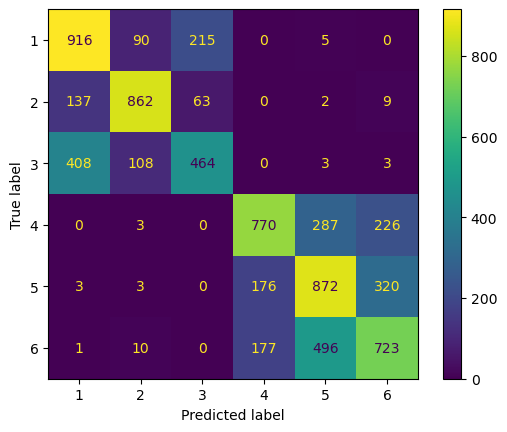

In [33]:
ConfusionMatrixDisplay.from_estimator(clf, X_train_cut, y_train)

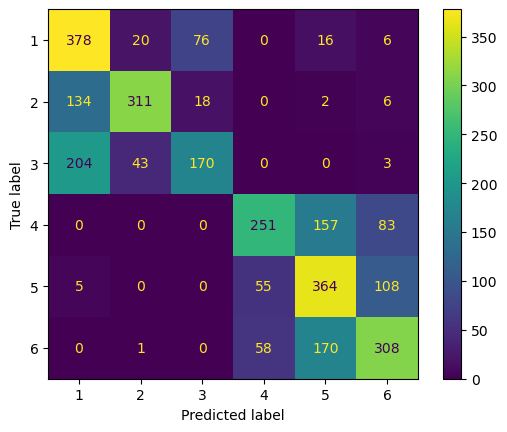

In [27]:
ConfusionMatrixDisplay.from_estimator(clf, X_test_cut, y_test)

In [36]:
melhor_ccp = resultados.iloc[grid.best_index_, 4]
clf = DecisionTreeClassifier(random_state=230873, ccp_alpha=melhor_ccp).fit(X_test_cut, y_test)
print('Acurácia da árvore na base de teste:', clf.score(X_test_cut, y_test))

Acurácia da árvore na base de teste: 0.6969799796403122
